In [34]:
#import statements
import chess
import chess.pgn
import requests
import io
from IPython.display import display, SVG
from supabase import create_client
from dotenv import load_dotenv
from stockfish import Stockfish
import os
#this is for jupyter notebook only, the flask applications both use environment variables
load_dotenv()

# Create a Supabase client
database_url = os.environ.get('FLASK_DATABASE_URL')
database_key = os.environ.get('FLASK_DATABASE_KEY')
supabase = create_client(
    database_url,
    database_key
)
#loading into stockfish for calculating eval at various positions
stockfish = Stockfish('/opt/homebrew/bin/stockfish', depth=16)

#getting hikaru's games in January 2023 from chess.com api and converting them to pgn
requests_string = f"https://api.chess.com/pub/player/hikaru/games/2023/{1}/pgn"
headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
            }
data = requests.get(requests_string, headers=headers)
pgn = io.StringIO(data.text)
print(data.text)

[Event "Live Chess"]
[Site "Chess.com"]
[Date "2023.01.27"]
[Round "-"]
[White "DanielNaroditsky"]
[Black "Hikaru"]
[Result "0-1"]
[CurrentPosition "8/8/8/3k4/p1q5/8/3K4/8 w - -"]
[Timezone "UTC"]
[ECO "B12"]
[ECOUrl "https://www.chess.com/openings/Caro-Kann-Defense-Advance-Short-Variation-with-4-Nf3...5.Be2-Ne7-6.O-O-h6-7.Nbd2"]
[UTCDate "2023.01.27"]
[UTCTime "07:16:52"]
[WhiteElo "3283"]
[BlackElo "3317"]
[TimeControl "60"]
[Termination "Hikaru won by resignation"]
[StartTime "07:16:52"]
[EndDate "2023.01.27"]
[EndTime "07:19:27"]
[Link "https://www.chess.com/game/live/68542929653"]

1. e4 {[%clk 0:01:00]} 1... c6 {[%clk 0:01:00]} 2. d4 {[%clk 0:00:59.5]} 2... d5 {[%clk 0:00:59.9]} 3. e5 {[%clk 0:00:59.1]} 3... Bf5 {[%clk 0:00:59.5]} 4. Nf3 {[%clk 0:00:59]} 4... e6 {[%clk 0:00:59.1]} 5. Be2 {[%clk 0:00:58.9]} 5... Ne7 {[%clk 0:00:58.5]} 6. O-O {[%clk 0:00:58.8]} 6... h6 {[%clk 0:00:58.2]} 7. Nbd2 {[%clk 0:00:58.3]} 7... Nd7 {[%clk 0:00:57.9]} 8. Ne1 {[%clk 0:00:57.8]} 8... c5 {[%clk

In [3]:
#function in order to load the game into the supabase database once I decide on a position and category to select it as
def upload_position(fen, white, black, to_move, top_five, gm_move, category, game_link, difficulty):
    supabase.tables("Puzzles").insert({"starting_pos": fen, "top_five": top_five, "gm_move": gm_move, "category": category,
                    "game_link": game_link, "white_username": white, "black_username": black, "difficulty": difficulty, to_move: to_move})

link https://www.chess.com/game/live/68542929653

move 31
r2q1k1r/pp3pp1/1b2p1bp/1B1pn3/3N4/2P5/PP3PPP/R1BQ1RK1 w - - 4 16


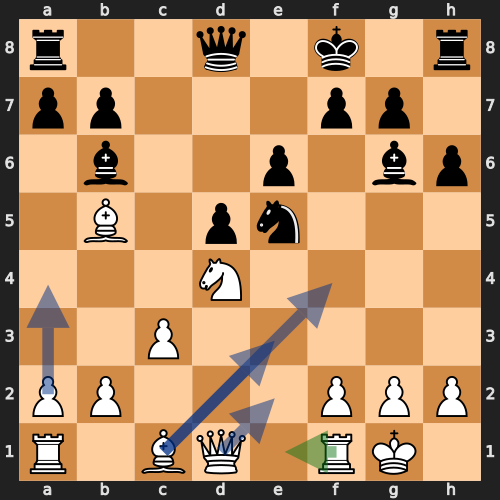

-104: Bf4
-105: Re1
-122: Qe2
-139: a4
-143: Be3
GM Move eval: -108

move 32
r2q1k1r/pp3pp1/1b2p1bp/1B1pn3/3N4/2P5/PP3PPP/R1BQR1K1 b - - 5 16


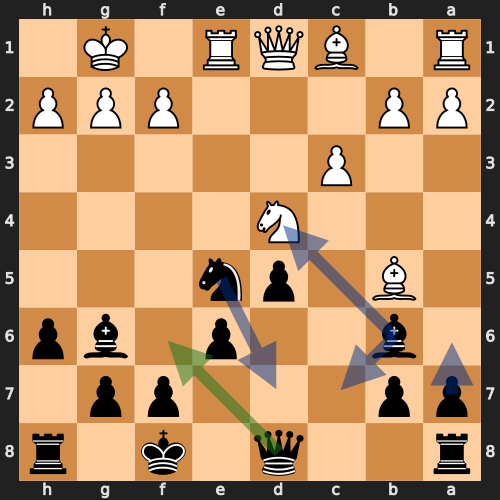

-109: Qf6
-103: a6
-90: Bc7
-34: Nd7
-34: Bxd4
GM Move eval: -120

move 33
r4k1r/pp3pp1/1b2pqbp/1B1pn3/3N4/2P5/PP3PPP/R1BQR1K1 w - - 6 17


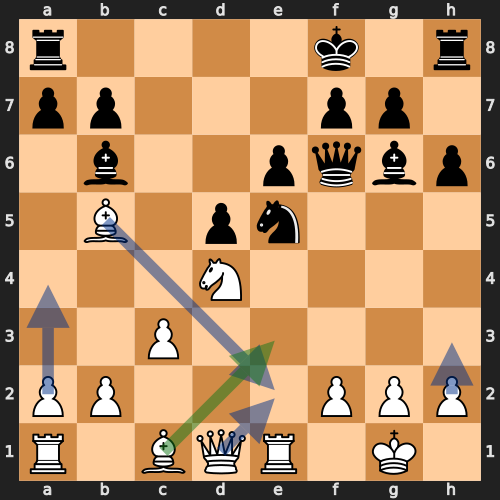

-111: Qe2
-117: Be3
-142: h3
-154: a4
-157: Be2
GM Move eval: -132

move 34
r4k1r/pp3pp1/1b2pqbp/1B1pn3/3N4/2P1B3/PP3PPP/R2QR1K1 b - - 7 17


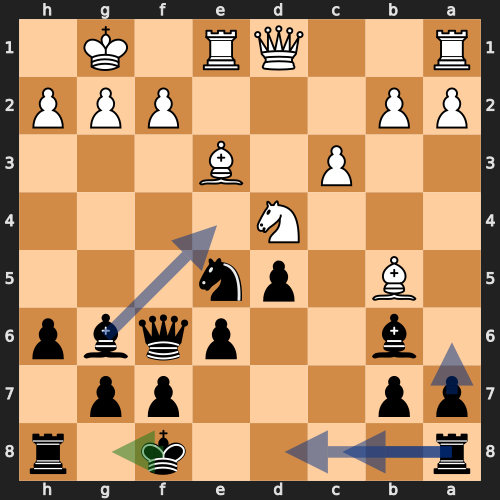

-131: Kg8
-103: Rd8
-101: a6
-97: Rc8
-62: Be4
GM Move eval: -132

move 35
r5kr/pp3pp1/1b2pqbp/1B1pn3/3N4/2P1B3/PP3PPP/R2QR1K1 w - - 8 18


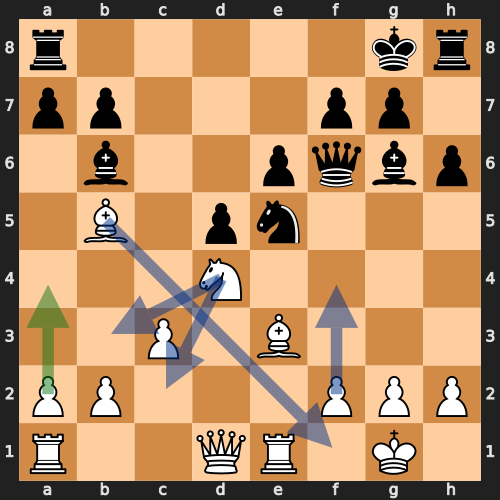

-120: Nb3
-136: f4
-161: a4
-164: Nc2
-165: Bf1
GM Move eval: -160

move 36
r5kr/pp3pp1/1b2pqbp/1B1pn3/P2N4/2P1B3/1P3PPP/R2QR1K1 b - - 0 18


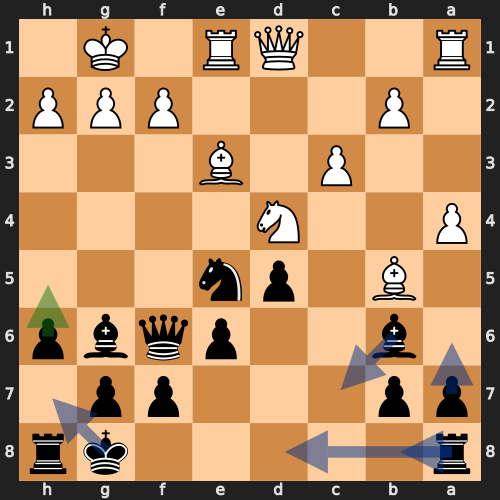

-164: a6
-130: Kh7
-115: Bc7
-109: Rb8
-67: Rd8
GM Move eval: -53

move 37
r5kr/pp3pp1/1b2pqb1/1B1pn2p/P2N4/2P1B3/1P3PPP/R2QR1K1 w - - 0 19


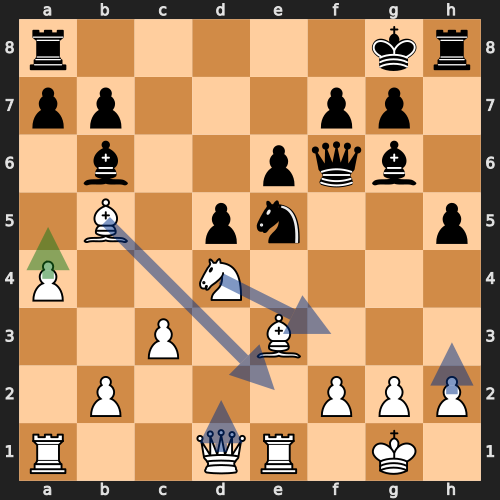

-43: Qd2
-70: a5
-87: h3
-93: Be2
-137: Nf3
GM Move eval: -78

move 38
r5kr/pp3pp1/1b2pqb1/PB1pn2p/3N4/2P1B3/1P3PPP/R2QR1K1 b - - 0 19


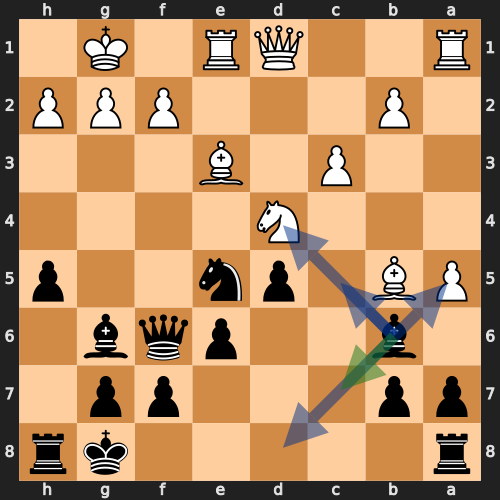

-79: Bd8
-37: Bc7
-29: Bc5
266: Bxd4
351: Bxa5
GM Move eval: -26

move 39
r5kr/ppb2pp1/4pqb1/PB1pn2p/3N4/2P1B3/1P3PPP/R2QR1K1 w - - 1 20


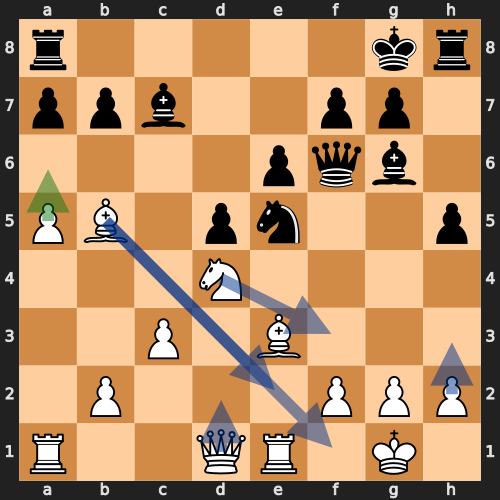

-23: Qd2
-87: h3
-139: Be2
-144: Nf3
-181: Bf1
GM Move eval: -180

move 40
r5kr/ppb2pp1/P3pqb1/1B1pn2p/3N4/2P1B3/1P3PPP/R2QR1K1 b - - 0 20


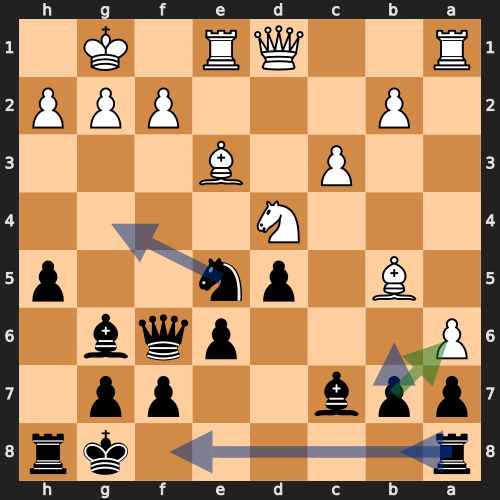

-183: bxa6
-63: Ng4
-37: Rb8
-5: b6
107: Rf8
GM Move eval: -189

move 41
r5kr/p1b2pp1/p3pqb1/1B1pn2p/3N4/2P1B3/1P3PPP/R2QR1K1 w - - 0 21


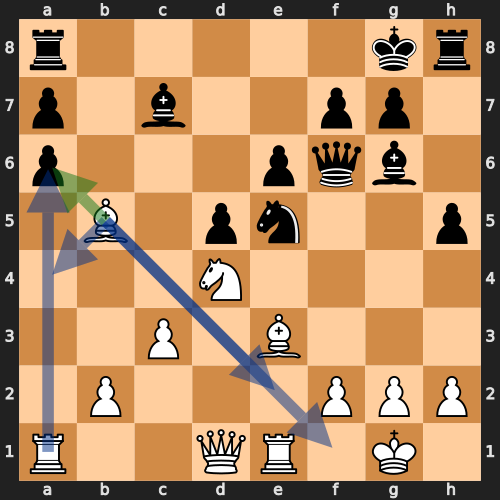

-179: Be2
-183: Rxa6
-203: Bxa6
-258: Ba4
-277: Bf1
GM Move eval: -215

move 42
r5kr/p1b2pp1/B3pqb1/3pn2p/3N4/2P1B3/1P3PPP/R2QR1K1 b - - 0 21


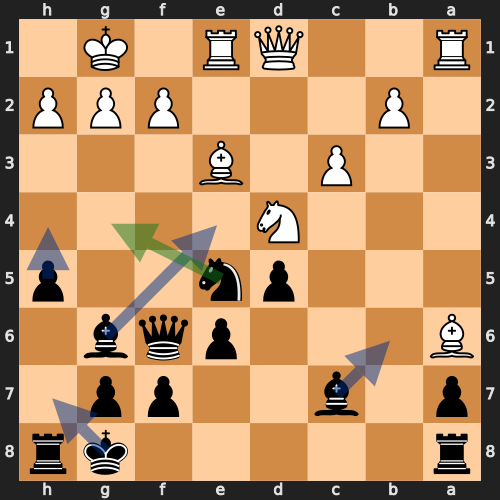

-198: Ng4
-71: Be4
-46: h4
-29: Kh7
-24: Bb6
GM Move eval: -196

move 43
r5kr/p1b2pp1/B3pqb1/3p3p/3N2n1/2P1B3/1P3PPP/R2QR1K1 w - - 1 22


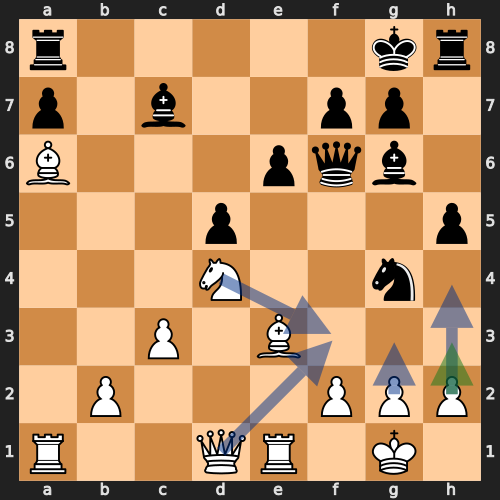

-208: h3
-251: Nf3
-276: g3
-298: Qf3
-298: h4
GM Move eval: -197

move 44
r5kr/p1b2pp1/B3pqb1/3p3p/3N2n1/2P1B2P/1P3PP1/R2QR1K1 b - - 0 22


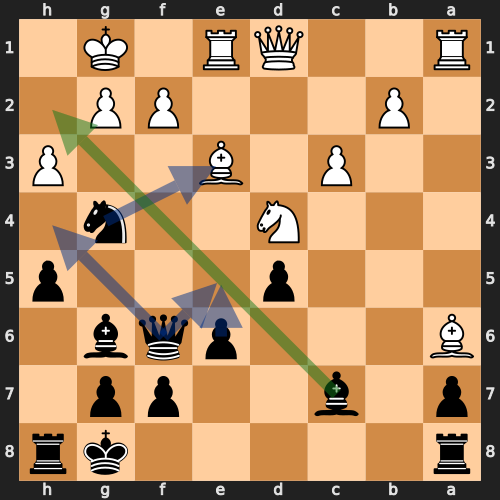

-203: Nxe3
-162: Bh2+
-104: e5
-20: Qe5
-10: Qh4
GM Move eval: -157

move 46
r5kr/p4pp1/B3pqb1/3p3p/3N2n1/2P1B2P/1P3PPb/R2QR2K b - - 2 23


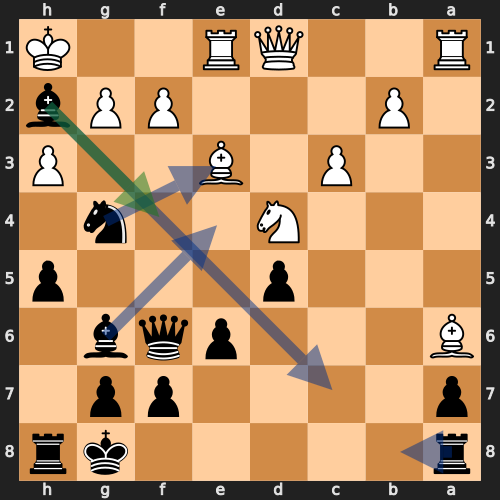

-202: Be4
-185: Nxe3
-161: Bf4
-119: Bc7
-107: Rb8
GM Move eval: -145

move 47
r5kr/p4pp1/B3pqb1/3p3p/3N1bn1/2P1B2P/1P3PP1/R2QR2K w - - 3 24


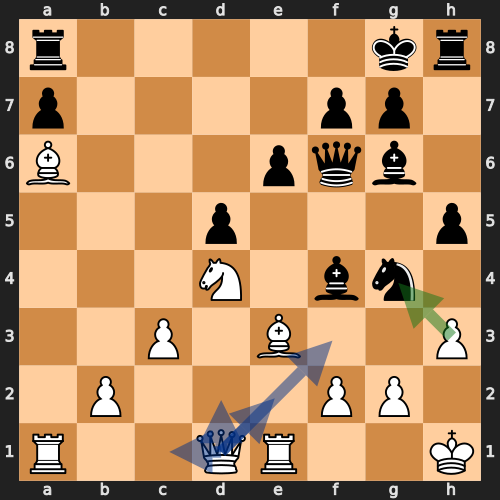

-139: hxg4
-209: Qf3
-237: Qd2
-248: Qe2
-291: Qc1
GM Move eval: -128

move 48
r5kr/p4pp1/B3pqb1/3p3p/3N1bP1/2P1B3/1P3PP1/R2QR2K b - - 0 24


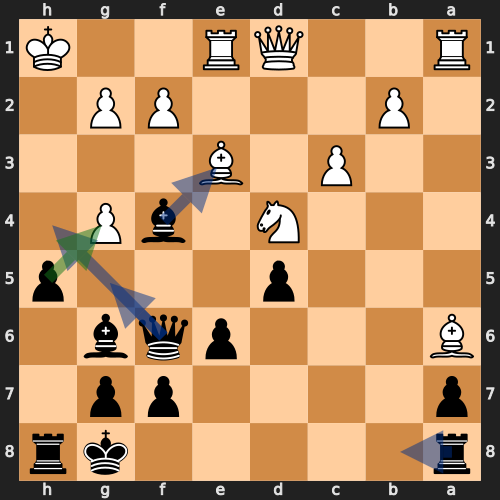

-121: hxg4+
-13: Qh4+
0: Bxe3
17: Qg5
258: Rb8
GM Move eval: -146

move 50
r5kr/p4pp1/B3pqb1/3p4/3N1bp1/2P1B3/1P3PP1/R2QR1K1 b - - 1 25


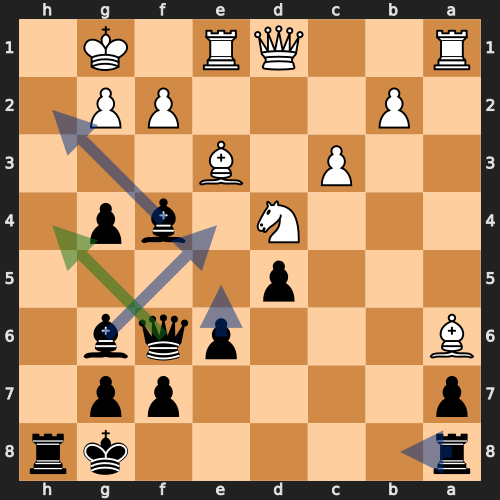

-158: Be4
-67: e5
-50: Bh2+
-41: Qh4
0: Rb8
GM Move eval: -23

move 51
r5kr/p4pp1/B3p1b1/3p4/3N1bpq/2P1B3/1P3PP1/R2QR1K1 w - - 2 26


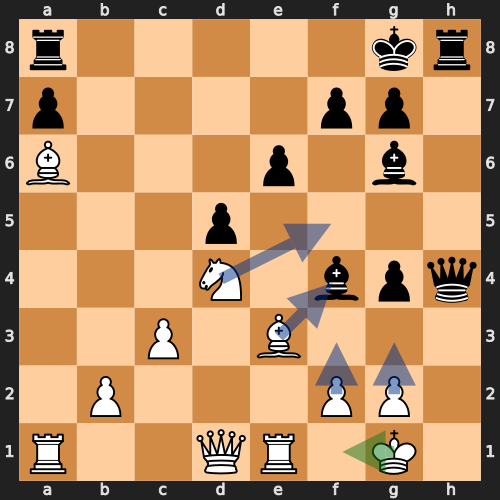

-7: Kf1
None: f3
None: Bxf4
None: g3
None: Nf5
GM Move eval: -58

move 52
r5kr/p4pp1/B3p1b1/3p4/3N1bpq/2P1B3/1P3PP1/R2QRK2 b - - 3 26


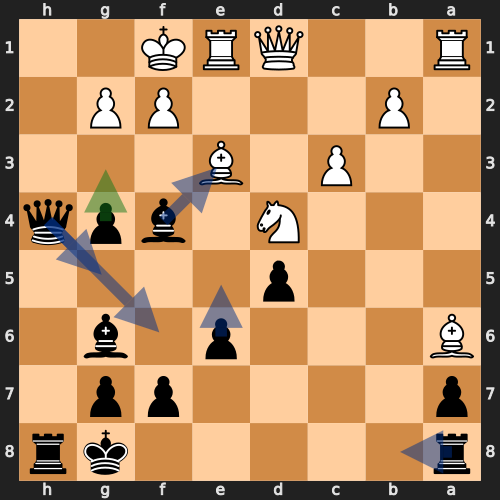

-38: e5
-35: Rb8
0: Qf6
0: Bxe3
4: Qg5
GM Move eval: 137

move 53
r5kr/p4pp1/B3p1b1/3p4/3N1b1q/2P1B1p1/1P3PP1/R2QRK2 w - - 0 27


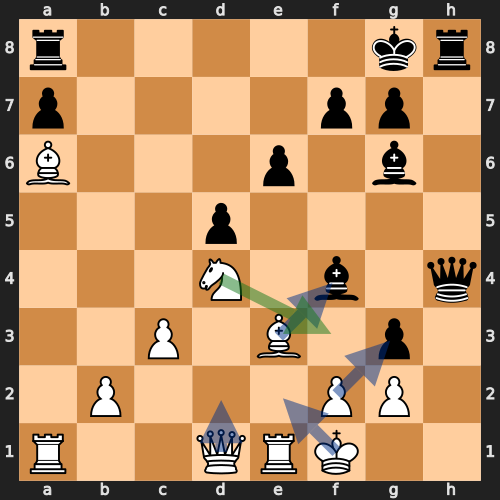

140: Nf3
-86: Ke2
-99: Qd2
-109: Bxf4
-179: fxg3
GM Move eval: 147

move 54
r5kr/p4pp1/B3p1b1/3p4/5b1q/2P1BNp1/1P3PP1/R2QRK2 b - - 1 27


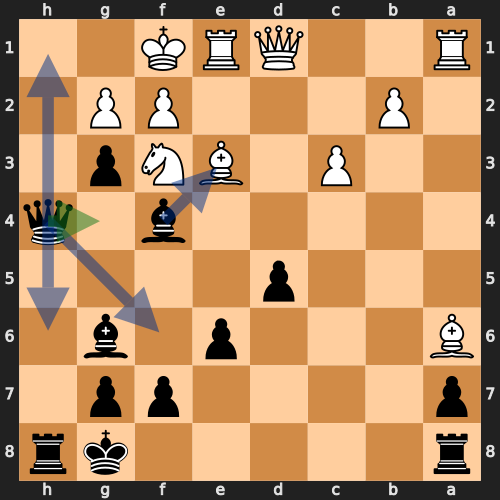

142: Qf6
148: Qg4
157: Qh6
252: Qh1+
357: Bxe3
GM Move eval: 178

move 55
r5kr/p4pp1/B3p1b1/3p4/5bq1/2P1BNp1/1P3PP1/R2QRK2 w - - 2 28


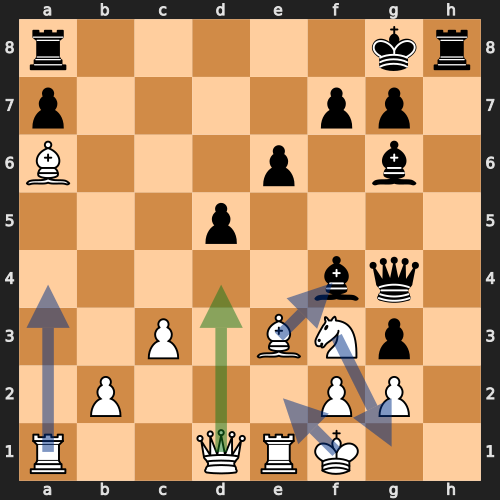

178: Ng1
130: Bxf4
37: Qd4
19: Ra4
0: Ke2
GM Move eval: 9

move 56
r5kr/p4pp1/B3p1b1/3p4/3Q1bq1/2P1BNp1/1P3PP1/R3RK2 b - - 3 28


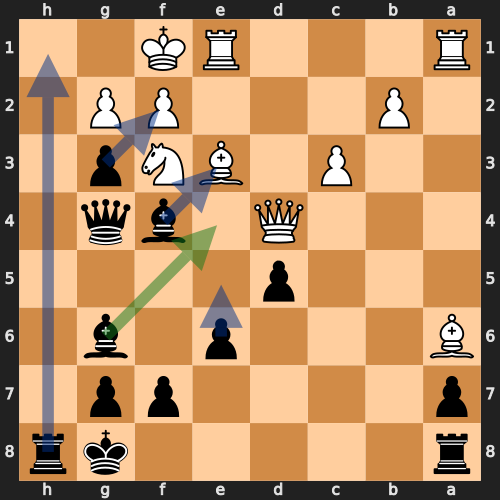

33: gxf2
49: Be4
127: Rh1+
142: e5
369: Bxe3
GM Move eval: 55

move 57
r5kr/p4pp1/B3p3/3p4/3Qbbq1/2P1BNp1/1P3PP1/R3RK2 w - - 4 29


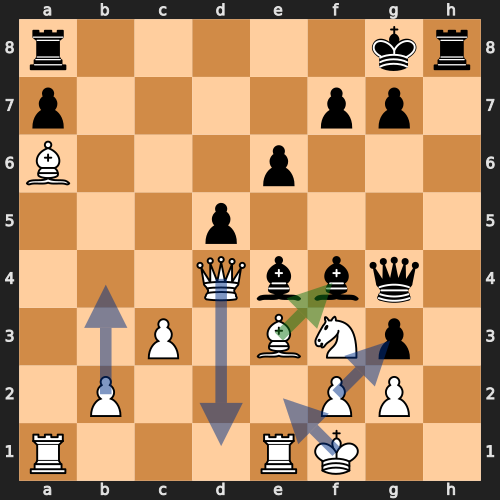

53: Bxf4
-328: fxg3
-348: Ke2
-467: Qd1
-502: b4
GM Move eval: 53

move 58
r5kr/p4pp1/B3p3/3p4/3QbBq1/2P2Np1/1P3PP1/R3RK2 b - - 0 29


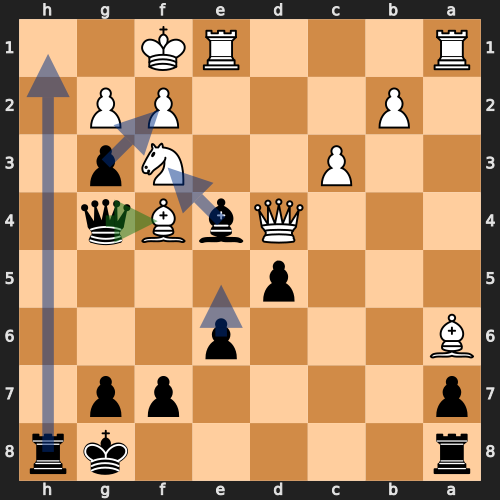

57: Bxf3
63: Qxf4
243: gxf2
247: Rh1+
255: e5
GM Move eval: 61

move 59
r5kr/p4pp1/B3p3/3p4/3Qbq2/2P2Np1/1P3PP1/R3RK2 w - - 0 30


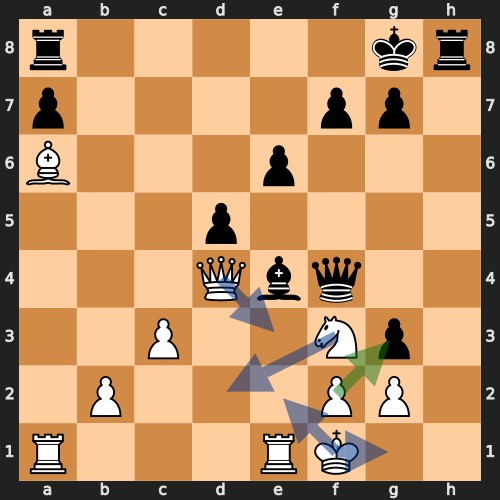

74: fxg3
57: Qe3
53: Ke2
-43: Kg1
-119: Nd2
GM Move eval: 79

move 60
r5kr/p4pp1/B3p3/3p4/3Qbq2/2P2NP1/1P4P1/R3RK2 b - - 0 30


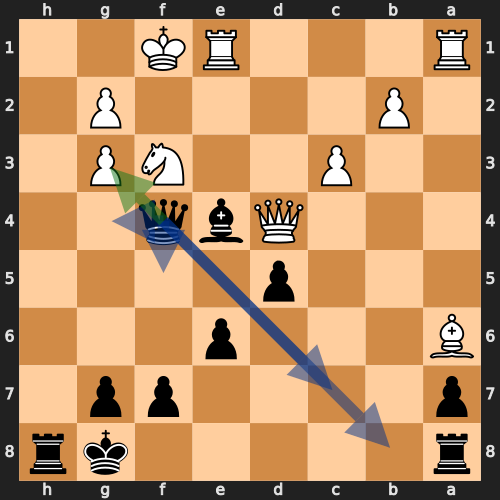

47: Qxg3
175: Qb8
183: Qg4
242: Qc7
268: Qf5
GM Move eval: 90

move 61
r5kr/p4pp1/B3p3/3p4/3Qb3/2P2Nq1/1P4P1/R3RK2 w - - 0 31


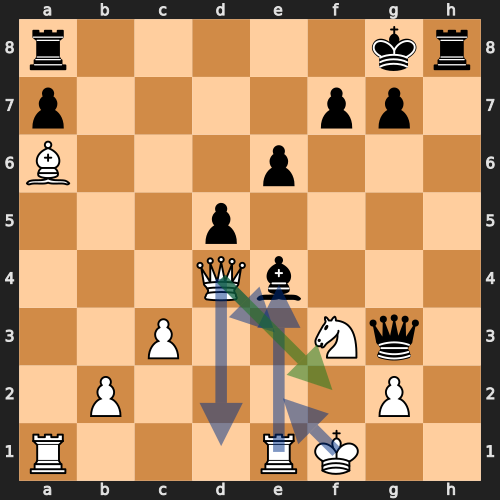

64: Qf2
-123: Rxe4
-384: Qe3
-392: Ke2
-445: Qd1
GM Move eval: 85

move 62
r5kr/p4pp1/B3p3/3p4/4b3/2P2Nq1/1P3QP1/R3RK2 b - - 1 31


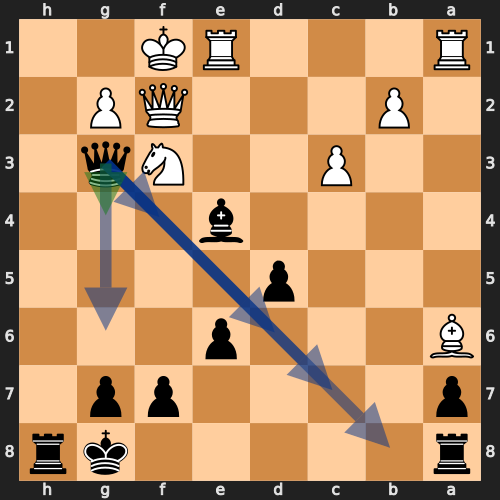

41: Qc7
68: Qg6
85: Qb8
91: Qf4
101: Qd6
GM Move eval: 107

move 63
r5kr/p4pp1/B3p3/3p4/4b1q1/2P2N2/1P3QP1/R3RK2 w - - 2 32


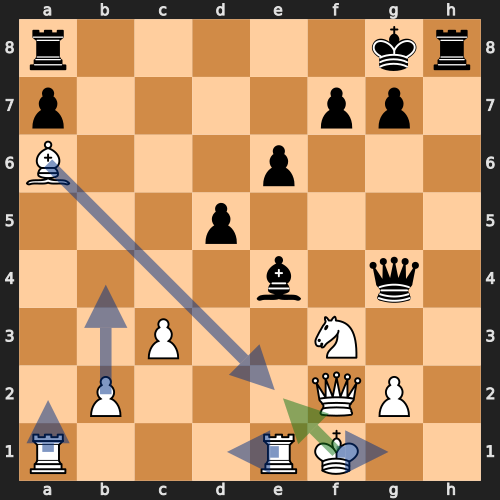

101: Kg1
32: b4
0: Red1
0: Be2
0: Ra2
GM Move eval: -16

move 64
r5kr/p4pp1/B3p3/3p4/4b1q1/2P2N2/1P2KQP1/R3R3 b - - 3 32


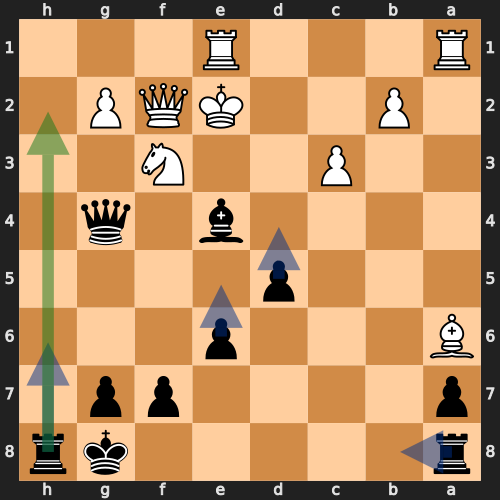

-20: Rb8
0: Rh2
59: d4
84: Rh6
95: e5
GM Move eval: 0

move 65
r5k1/p4pp1/B3p3/3p4/4b1q1/2P2N2/1P2KQPr/R3R3 w - - 4 33


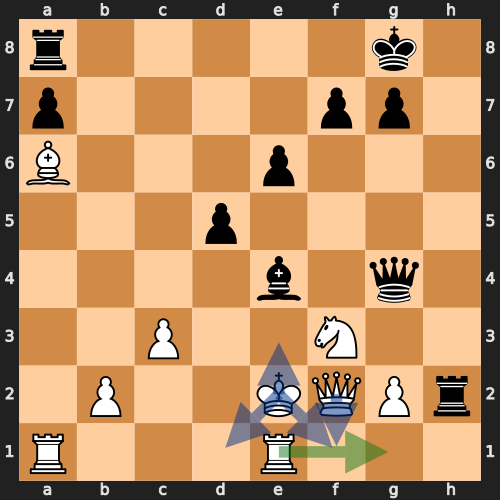

12: Rg1
0: Kf1
-354: Ke3
-434: Kd1
-483: Qf1
GM Move eval: 11

move 66
r5k1/p4pp1/B3p3/3p4/4b1q1/2P2N2/1P2KQPr/R5R1 b - - 5 33


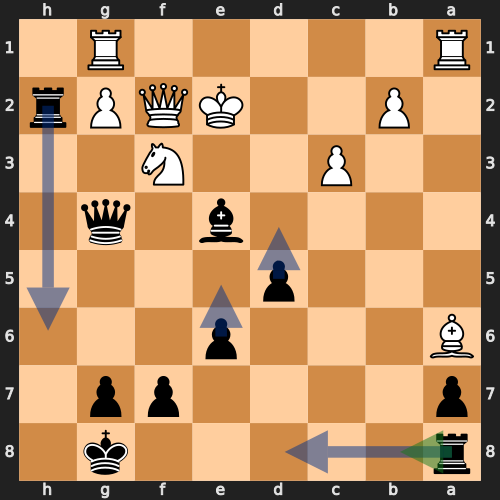

6: Rb8
25: Rd8
35: d4
53: e5
96: Rh6
GM Move eval: 0

move 67
1r4k1/p4pp1/B3p3/3p4/4b1q1/2P2N2/1P2KQPr/R5R1 w - - 6 34


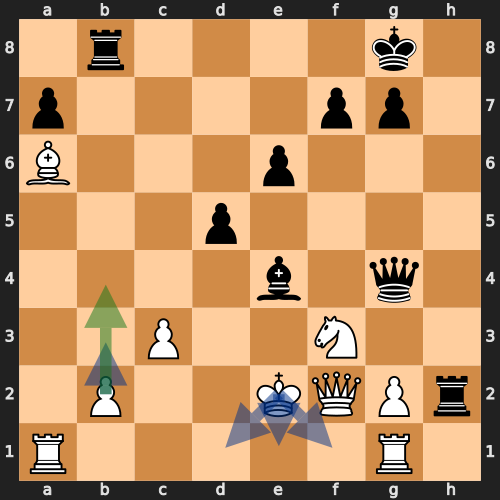

9: b4
-37: Ke1
-44: Kf1
-73: Kd1
-99: b3
GM Move eval: 0

move 68
1r4k1/p4pp1/B3p3/3p4/1P2b1q1/2P2N2/4KQPr/R5R1 b - - 0 34


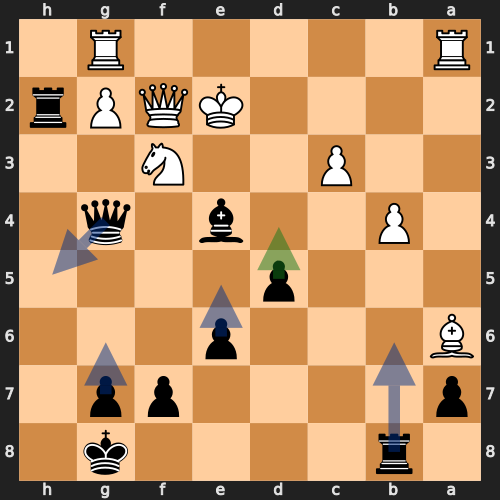

6: d4
16: Rb6
33: g6
98: e5
103: Qh5
GM Move eval: -2

move 69
1r4k1/p4pp1/B3p3/8/1P1pb1q1/2P2N2/4KQPr/R5R1 w - - 0 35


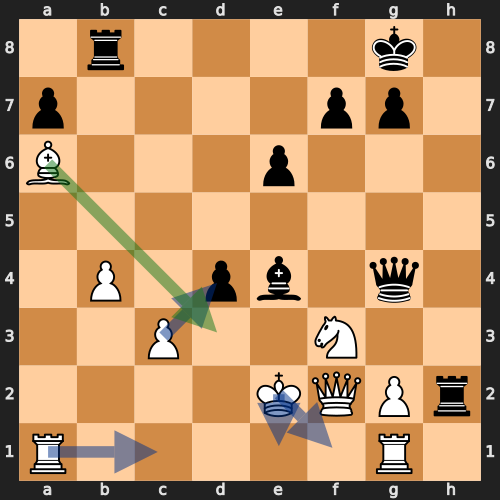

8: Ke1
0: Bd3
-17: Kf1
-76: Rac1
-162: cxd4
GM Move eval: 0

move 70
1r4k1/p4pp1/4p3/8/1P1pb1q1/2PB1N2/4KQPr/R5R1 b - - 1 35


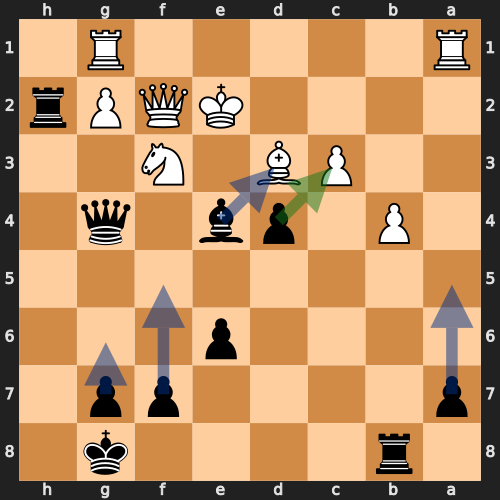

-10: dxc3
0: f5
0: a5
13: g6
14: Bxd3+
GM Move eval: -2

move 71
1r4k1/p4pp1/4p3/8/1P2b1q1/2pB1N2/4KQPr/R5R1 w - - 0 36


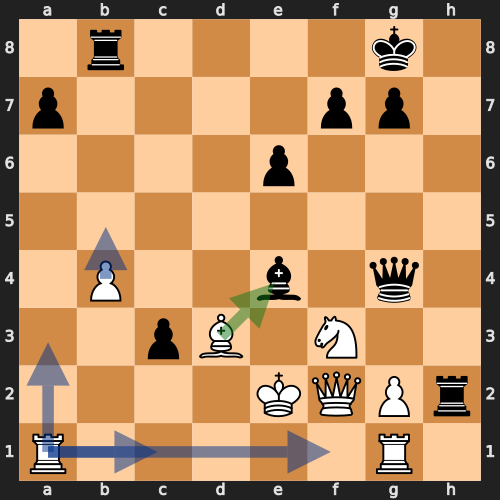

1: Bxe4
-195: Ra3
-207: Rac1
-311: b5
-318: Raf1
GM Move eval: 3

move 72
1r4k1/p4pp1/4p3/8/1P2B1q1/2p2N2/4KQPr/R5R1 b - - 0 36


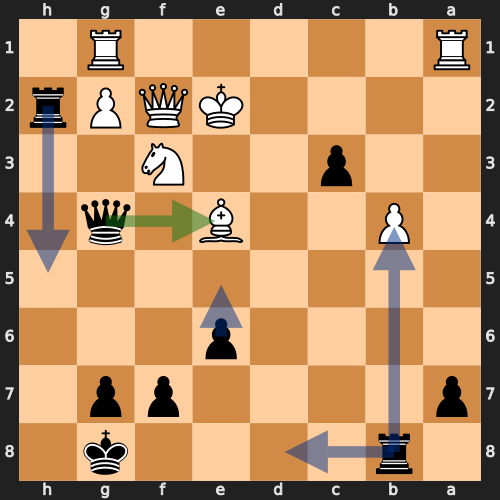

-1: Qxe4+
211: e5
255: Rd8
266: Rxb4
268: Rh5
GM Move eval: 0

move 74
1r4k1/p4pp1/4p3/8/1P2q3/2p1QN2/4K1Pr/R5R1 b - - 1 37


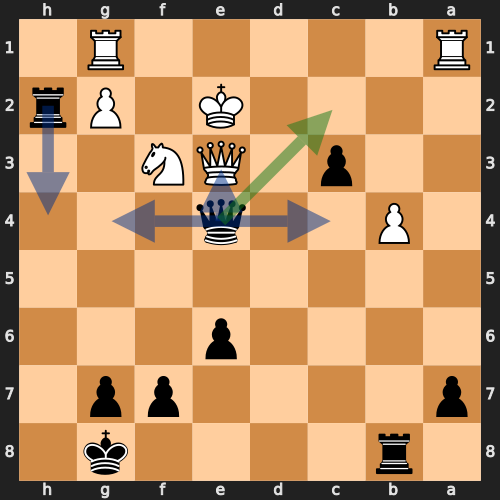

-6: Qc2+
0: Qc4+
10: Qxe3+
10: Qg4
156: Rh4
GM Move eval: 2

move 76
1r4k1/p4pp1/4p3/8/1P6/2p1QN2/2q3Pr/R4KR1 b - - 3 38


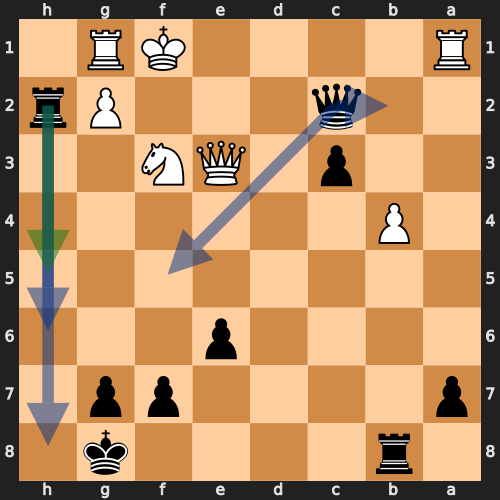

1: Qb2
1: Rh5
9: Rh6
31: Rh8
32: Qf5
GM Move eval: 0

move 77
1r4k1/p4pp1/4p3/7r/1P6/2p1QN2/2q3P1/R4KR1 w - - 4 39


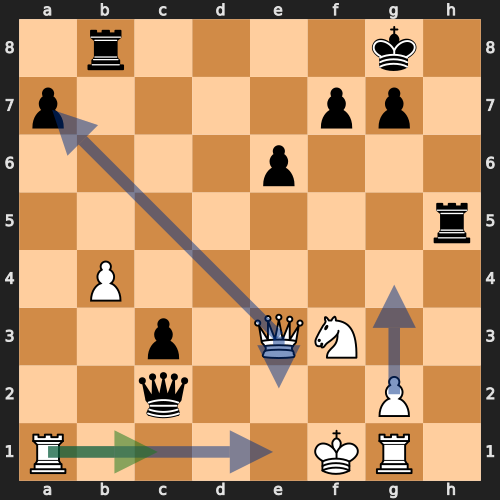

2: Rc1
-69: Re1
-71: g4
-106: Qe2
-121: Qxa7
GM Move eval: 2

move 78
1r4k1/p4pp1/4p3/7r/1P6/2p1QN2/2q3P1/2R2KR1 b - - 5 39


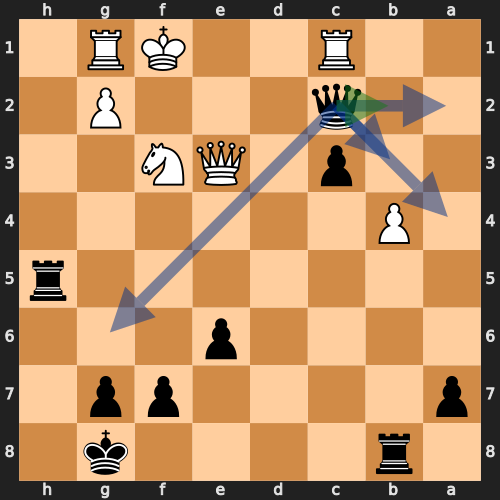

-1: Qb2
20: Qb3
22: Qa2
25: Qa4
40: Qg6
GM Move eval: 1

move 79
1r4k1/p4pp1/4p3/7r/1P6/2p1QN2/1q4P1/2R2KR1 w - - 6 40


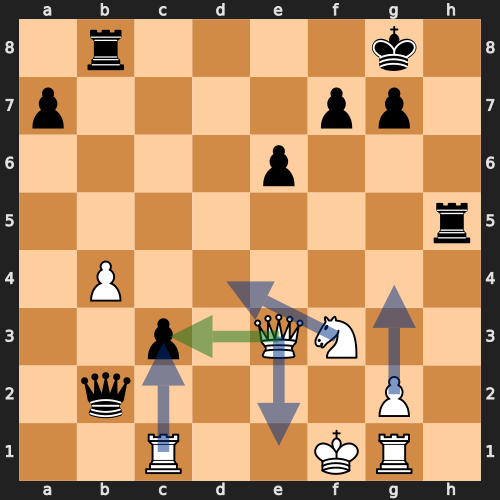

6: Rxc3
-1: Qxc3
-46: g4
-92: Qe1
-171: Nd4
GM Move eval: 11

move 80
1r4k1/p4pp1/4p3/7r/1P6/2Q2N2/1q4P1/2R2KR1 b - - 0 40


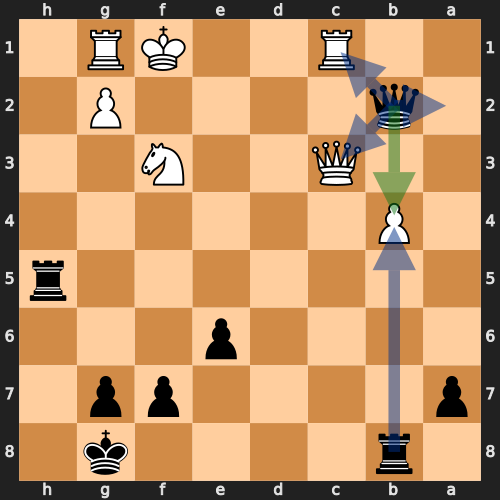

6: Rxb4
17: Qxc3
21: Qxb4
99: Qa2
413: Qxc1+
GM Move eval: 20

move 81
1r4k1/p4pp1/4p3/7r/1q6/2Q2N2/6P1/2R2KR1 w - - 0 41


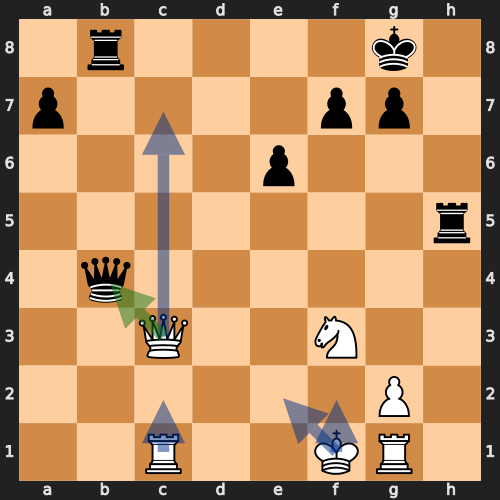

20: Qxb4
11: Qc7
7: Ke2
6: Kf2
0: Rc2
GM Move eval: 6

move 82
1r4k1/p4pp1/4p3/7r/1Q6/5N2/6P1/2R2KR1 b - - 0 41


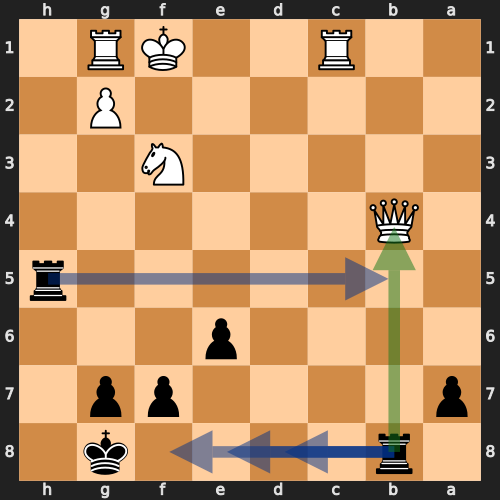

20: Rxb4
576: Rhb5
593: Re8
600: Rd8
603: Rf8
GM Move eval: 17

move 83
6k1/p4pp1/4p3/7r/1r6/5N2/6P1/2R2KR1 w - - 0 42


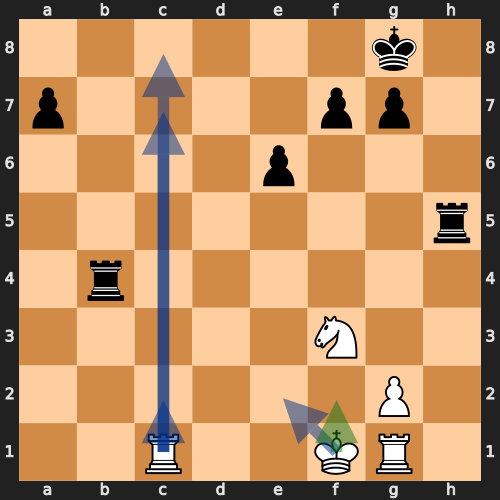

19: Rc8+
17: Kf2
11: Rc2
9: Rc7
5: Ke2
GM Move eval: 5

move 84
6k1/p4pp1/4p3/7r/1r6/5N2/5KP1/2R3R1 b - - 1 42


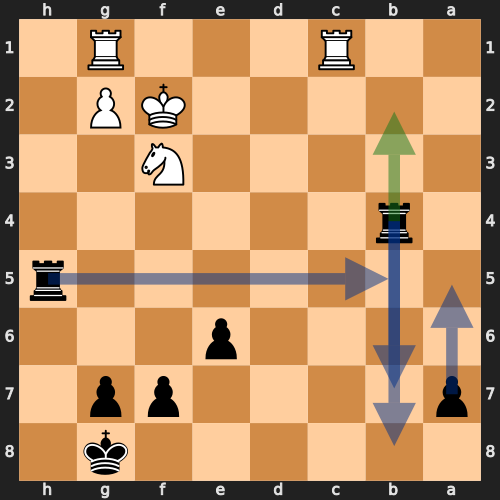

7: Rb7
14: a5
14: Rb2+
17: Rhb5
20: Rb8
GM Move eval: 10

move 85
6k1/p4pp1/4p3/7r/8/5N2/1r3KP1/2R3R1 w - - 2 43


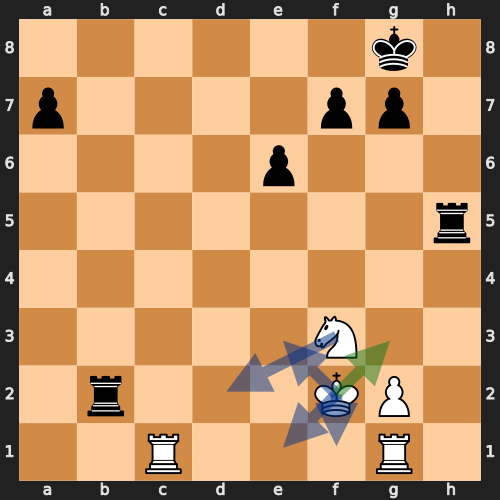

14: Kg3
1: Ke3
-18: Kf1
-22: Ke1
-431: Nd2
GM Move eval: 15

move 86
6k1/p4pp1/4p3/7r/8/5NK1/1r4P1/2R3R1 b - - 3 43


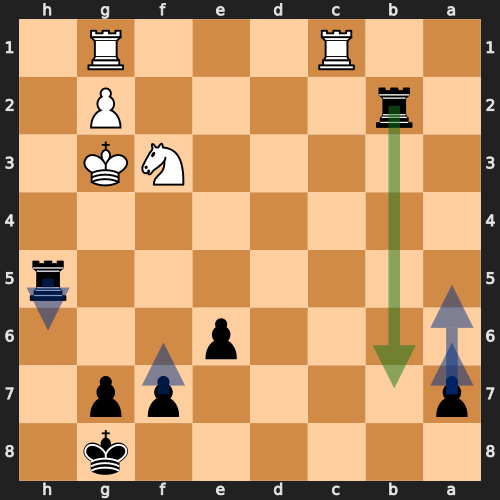

12: Rh6
13: f6
20: Rb7
20: a5
20: a6
GM Move eval: 13

move 87
6k1/pr3pp1/4p3/7r/8/5NK1/6P1/2R3R1 w - - 4 44


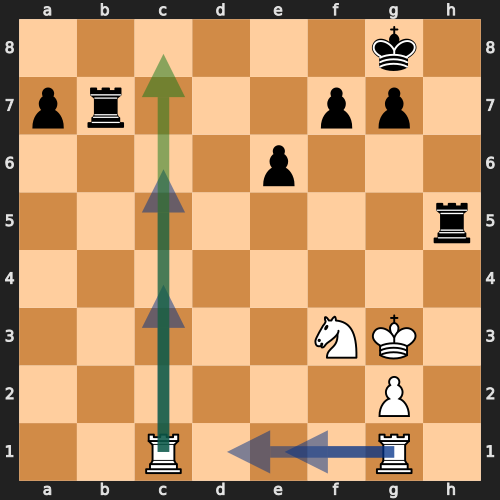

17: Rc8+
16: Rgd1
14: Rc6
14: Rge1
13: Rc4
GM Move eval: 18

move 89
2R5/pr3ppk/4p3/7r/8/5NK1/6P1/6R1 w - - 6 45


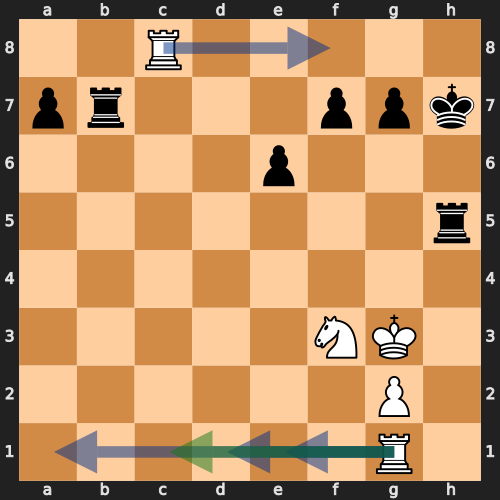

25: Rgc1
20: Re1
18: Ra1
18: Rd1
18: Rf8
GM Move eval: 13

move 90
2R5/pr3ppk/4p3/7r/8/5NK1/6P1/2R5 b - - 7 45


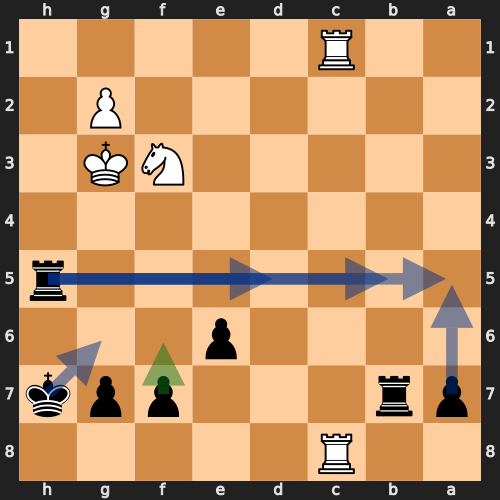

17: Rhb5
20: Ra5
20: Rd5
22: Kg6
24: a5
GM Move eval: 34

move 91
2R5/pr4pk/4pp2/7r/8/5NK1/6P1/2R5 w - - 0 46


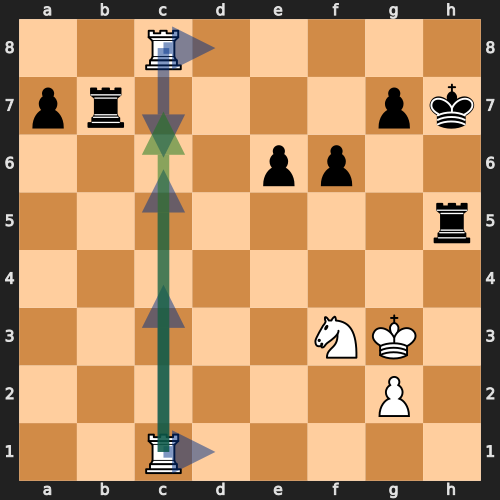

23: R8c6
23: R1c6
21: Rd1
17: R1c4
14: Rd8
GM Move eval: 18

move 92
2R5/prR3pk/4pp2/7r/8/5NK1/6P1/8 b - - 1 46


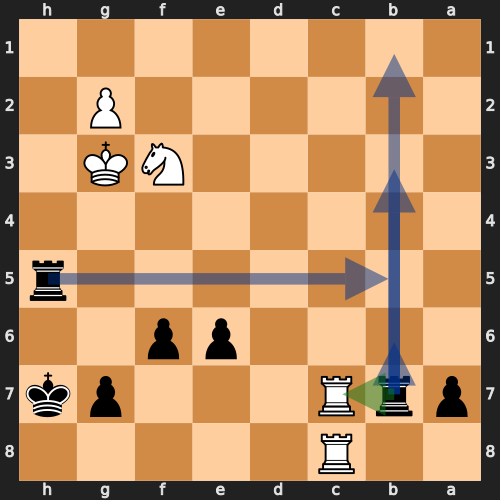

13: Rxc7
25: Rhb5
59: Rb3
62: Rb6
65: Rb1
GM Move eval: 21

move 93
2R5/p1r3pk/4pp2/7r/8/5NK1/6P1/8 w - - 0 47


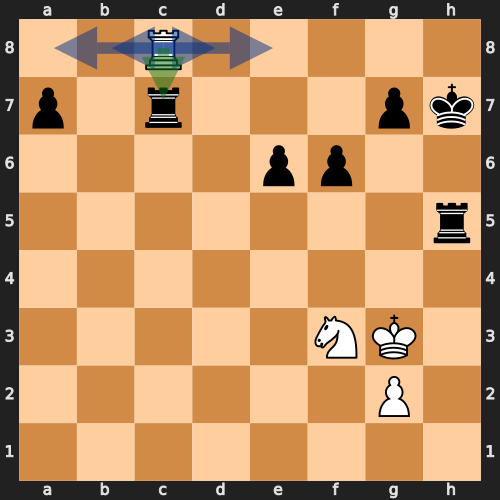

23: Rxc7
-483: Rd8
-484: Rb8
-487: Ra8
-494: Re8
GM Move eval: 16

move 94
8/p1R3pk/4pp2/7r/8/5NK1/6P1/8 b - - 0 47


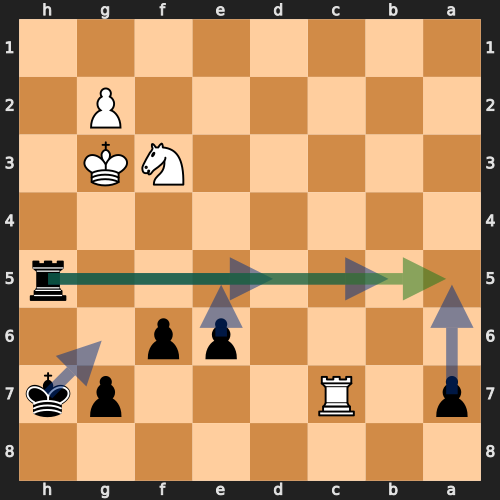

10: Rd5
17: a5
32: Rb5
41: e5
45: Kg6
GM Move eval: 40

move 95
8/p1R3pk/4pp2/r7/8/5NK1/6P1/8 w - - 1 48


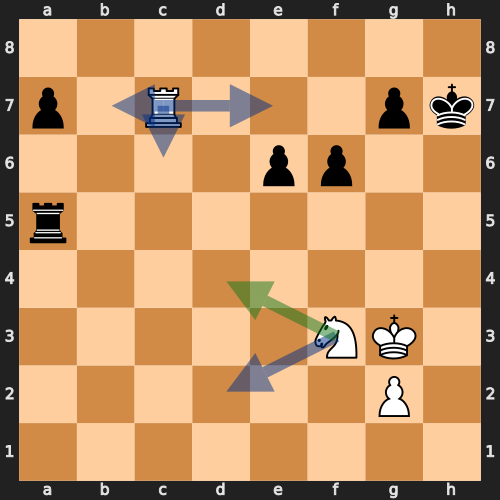

45: Nd4
19: Re7
10: Rc6
8: Nd2
1: Rb7
GM Move eval: 42

move 96
8/p1R3pk/4pp2/r7/3N4/6K1/6P1/8 b - - 2 48


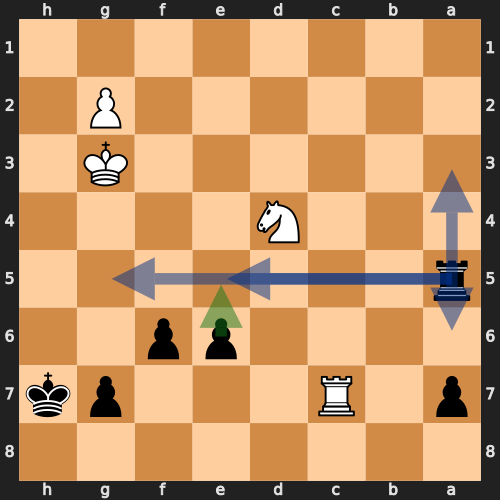

43: Ra6
44: e5
47: Ra3+
79: Rg5+
91: Re5
GM Move eval: 37

move 97
8/p1R3pk/5p2/r3p3/3N4/6K1/6P1/8 w - - 0 49


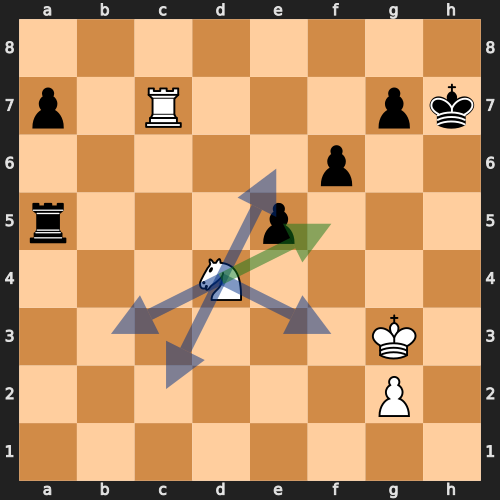

57: Ne6
20: Nf5
0: Nc2
0: Nf3
-6: Nb3
GM Move eval: 16

move 98
8/p1R3pk/5p2/r3pN2/8/6K1/6P1/8 b - - 1 49


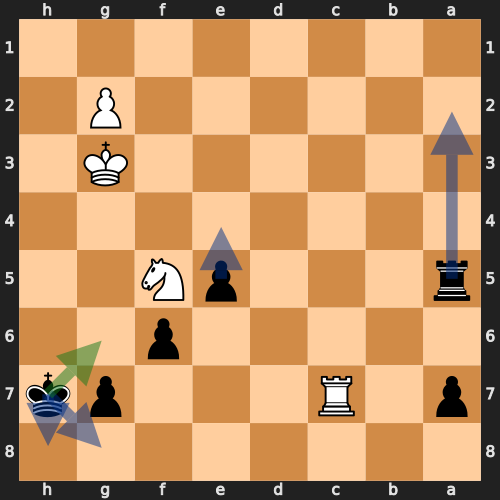

28: Kg6
207: Kh8
230: e4
267: Kg8
301: Ra2
GM Move eval: 19

move 99
8/p1R3p1/5pk1/r3pN2/8/6K1/6P1/8 w - - 2 50


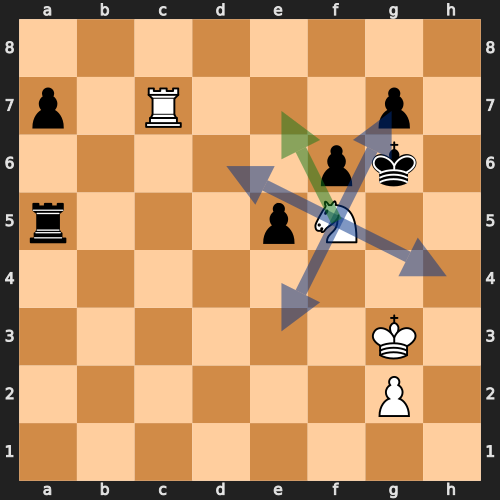

19: Nh4+
18: Nd6
17: Nxg7
10: Ne7+
0: Ne3
GM Move eval: 3

move 100
8/p1R1N1p1/5pk1/r3p3/8/6K1/6P1/8 b - - 3 50


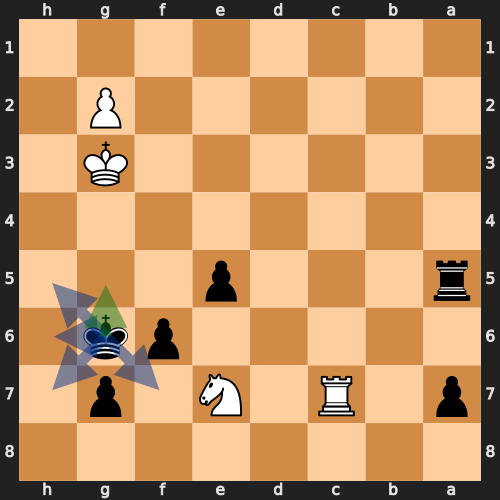

0: Kg5
5: Kh5
81: Kh6
100: Kh7
464: Kf7
GM Move eval: 3

move 101
8/p1R1N1p1/5p2/r3p1k1/8/6K1/6P1/8 w - - 4 51


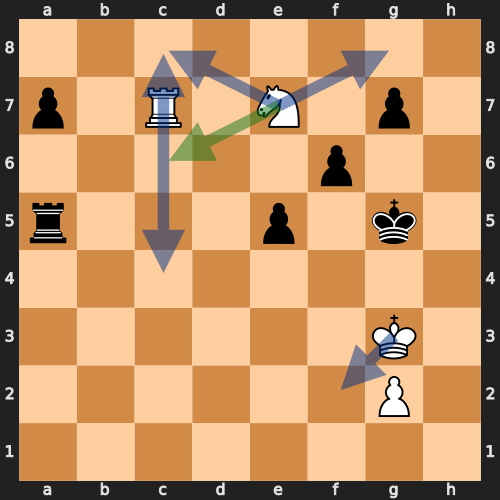

0: Ng8
0: Rc4
0: Nc8
0: Rc8
-4: Kf2
GM Move eval: -25

move 102
8/p1R3p1/2N2p2/r3p1k1/8/6K1/6P1/8 b - - 5 51


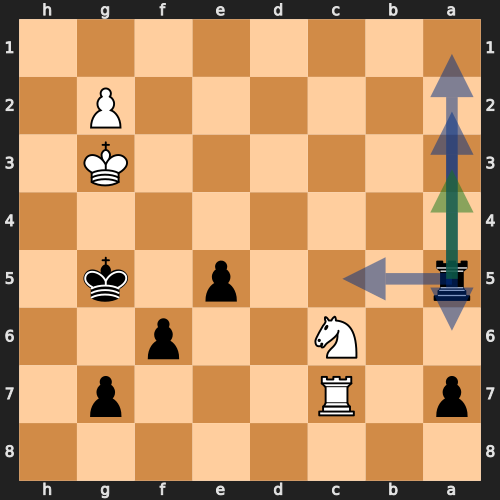

-27: Rc5
-24: Ra3+
10: Ra6
133: Ra1
137: Ra2
GM Move eval: -23

move 104
8/p1R3p1/2N2p2/4p1k1/8/r7/5KP1/8 b - - 7 52


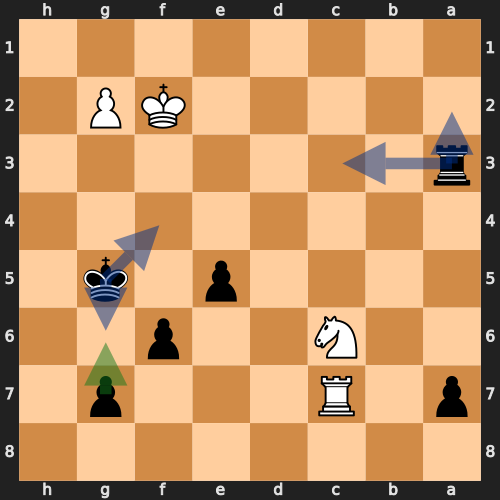

-35: Rc3
-13: Ra2+
-9: g6
10: Kg6
10: Kf4
GM Move eval: -15

move 105
8/p1R5/2N2pp1/4p1k1/8/r7/5KP1/8 w - - 0 53


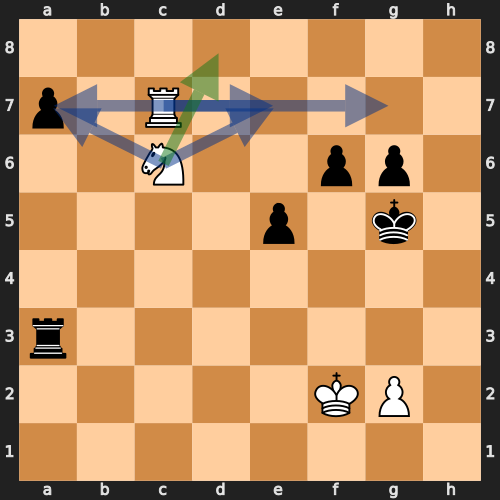

0: Nxa7
0: Ne7
-4: Rg7
-6: Rxa7
-11: Re7
GM Move eval: -16

move 106
3N4/p1R5/5pp1/4p1k1/8/r7/5KP1/8 b - - 1 53


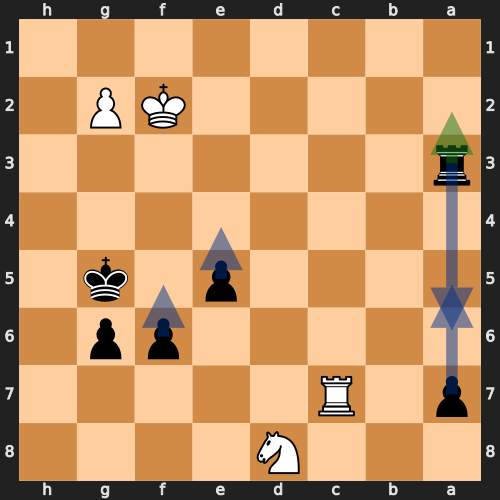

-14: f5
-11: a5
-5: Ra6
-3: Ra2+
-3: e4
GM Move eval: 0

move 107
3N4/p1R5/5pp1/4p1k1/8/8/r4KP1/8 w - - 2 54


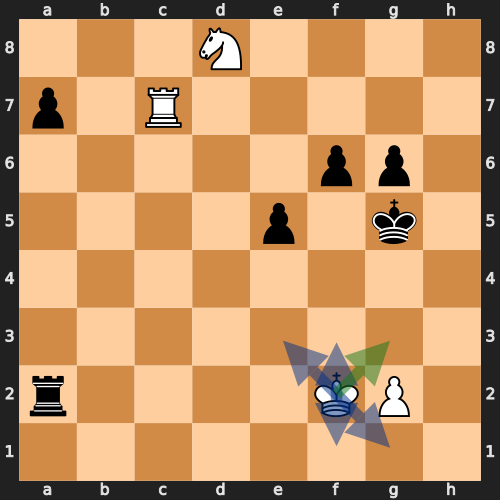

0: Kg3
-15: Kg1
-15: Kf3
-21: Kf1
-24: Ke3
GM Move eval: -5

move 108
3N4/p1R5/5pp1/4p1k1/8/6K1/r5P1/8 b - - 3 54


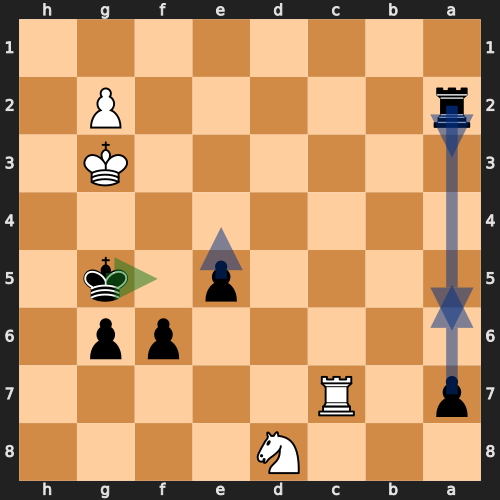

-4: Ra3+
0: Ra6
0: Kf5
1: a5
2: e4
GM Move eval: 0

move 109
3N4/p1R5/5pp1/4pk2/8/6K1/r5P1/8 w - - 4 55


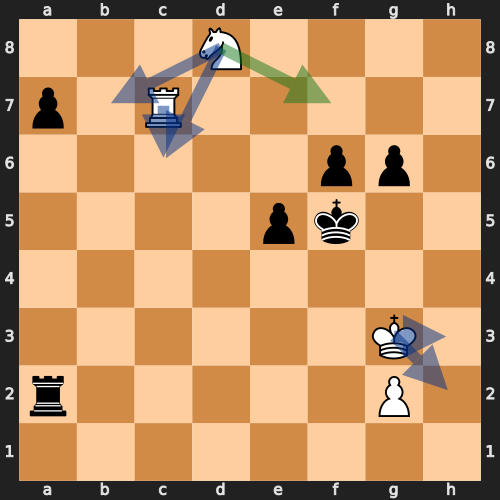

3: Nc6
1: Rc6
-4: Kh2
-7: Nb7
-9: Kh3
GM Move eval: -8

move 110
8/p1R2N2/5pp1/4pk2/8/6K1/r5P1/8 b - - 5 55


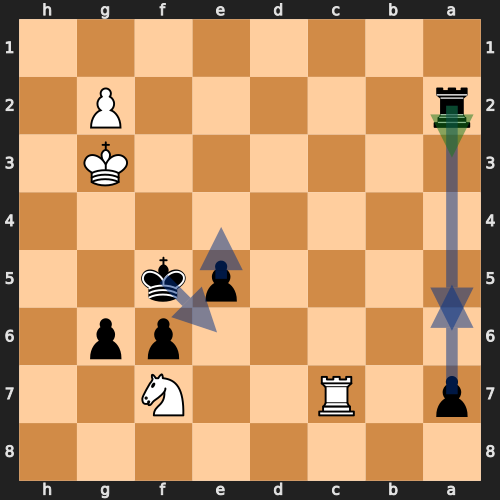

-12: Ke6
-10: Ra3+
0: Ra6
0: e4
0: a5
GM Move eval: -10

move 112
8/p1R2N2/5pp1/4pk2/8/r7/6PK/8 b - - 7 56


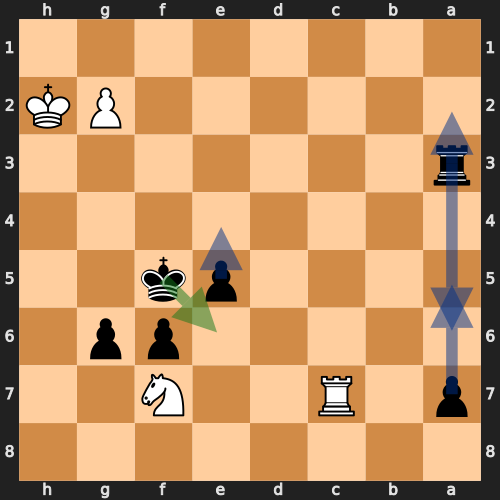

-7: Ra6
0: e4
0: Ke6
0: a5
0: Ra2
GM Move eval: -1

move 113
8/p1R2N2/4kpp1/4p3/8/r7/6PK/8 w - - 8 57


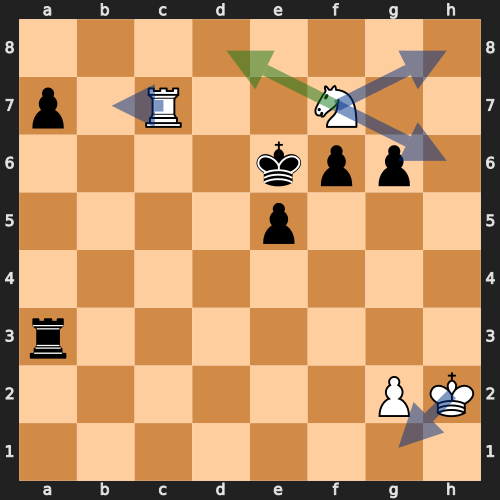

0: Nh6
-1: Nd8+
-11: Rb7
-13: Nh8
-15: Kg1
GM Move eval: -3

move 115
3N4/p1R5/5pp1/3kp3/8/r7/6PK/8 w - - 10 58


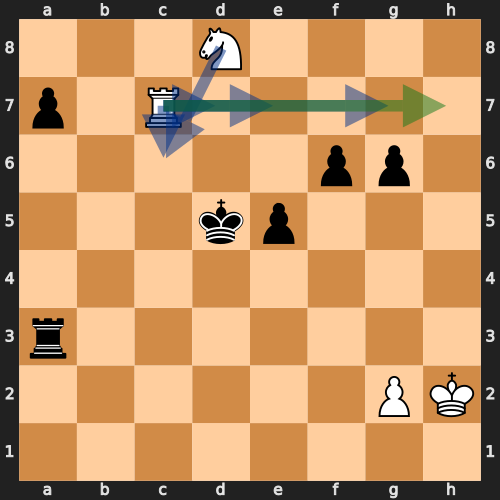

-3: Rd7+
-5: Rg7
-7: Nc6
-7: Rc6
-13: Re7
GM Move eval: -17

move 116
3N4/p6R/5pp1/3kp3/8/r7/6PK/8 b - - 11 58


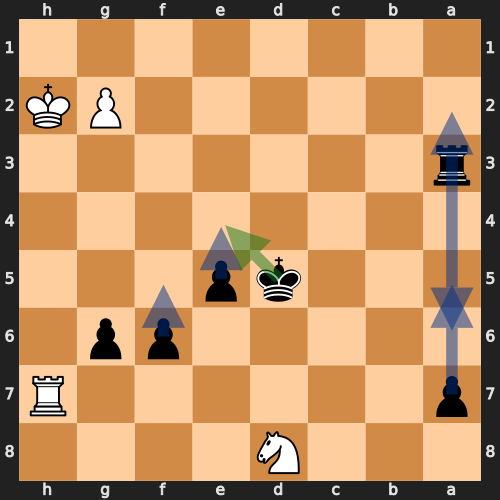

-16: Ra6
-14: a5
-12: e4
-3: Ra2
-2: f5
GM Move eval: -2

move 117
3N4/p6R/5pp1/4p3/4k3/r7/6PK/8 w - - 12 59


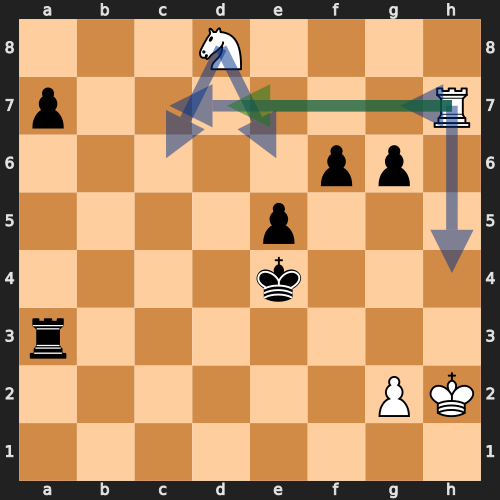

-2: Rc7
-3: Nc6
-5: Rg7
-7: Rh4+
-7: Ne6
GM Move eval: -236

move 118
3N4/p2R4/5pp1/4p3/4k3/r7/6PK/8 b - - 13 59


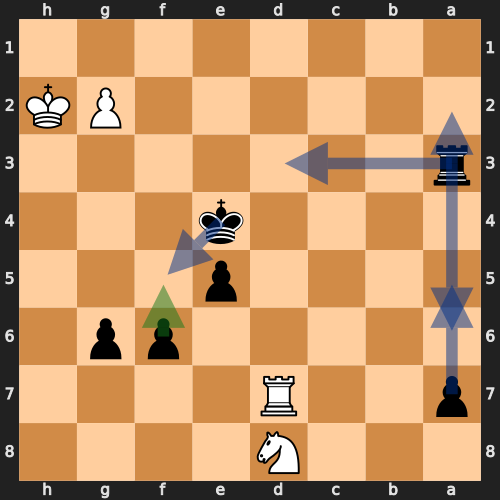

-201: Rd3
-17: Ra6
-9: a5
-5: Ra2
-3: Kf5
GM Move eval: -6

move 119
3N4/p2R4/6p1/4pp2/4k3/r7/6PK/8 w - - 0 60


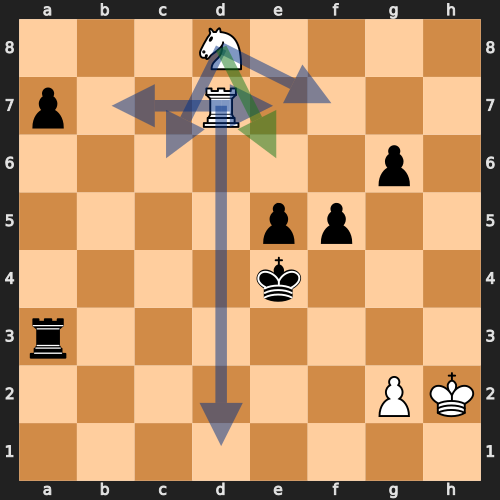

0: Nf7
-3: Re7
-6: Nc6
-11: Rb7
-13: Rd1
GM Move eval: -17

move 120
8/p2R4/4N1p1/4pp2/4k3/r7/6PK/8 b - - 1 60


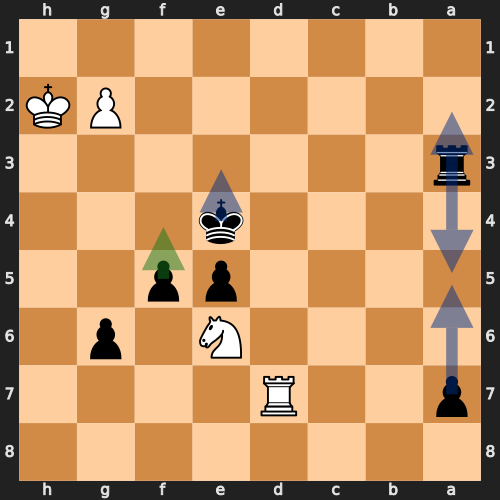

-21: a5
-17: Ke3
-15: Ra2
-14: f4
-9: Ra5
GM Move eval: -14

move 121
8/p2R4/4N1p1/4p3/4kp2/r7/6PK/8 w - - 0 61


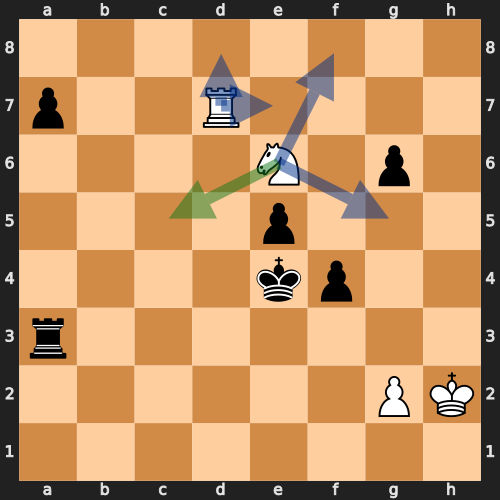

-11: Re7
-15: Rd8
-15: Nc5+
-17: Nf8
-21: Ng5+
GM Move eval: -17

move 123
8/p2R4/6p1/2N1pk2/5p2/r7/6PK/8 w - - 2 62


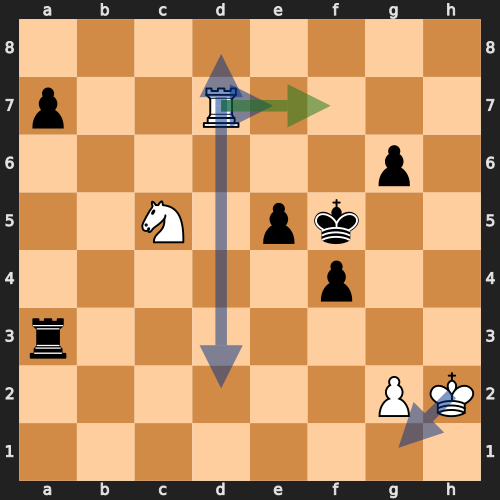

-4: Rf7+
-14: Rd8
-17: Kg1
-18: Re7
-28: Rd2
GM Move eval: -11

move 125
8/p4R2/6p1/2N1p3/5pk1/r7/6PK/8 w - - 4 63


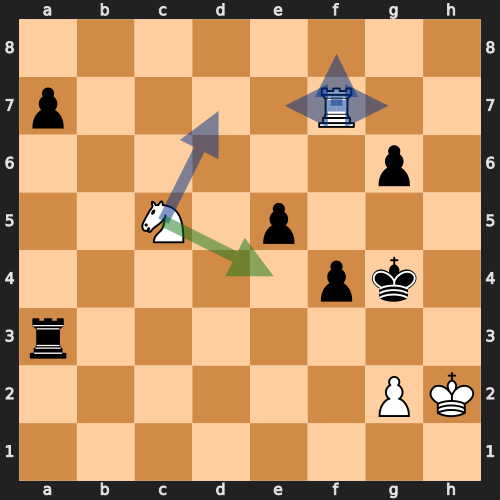

-10: Nd7
-12: Ne4
-12: Rg7
-16: Re7
-17: Rf8
GM Move eval: -16

move 126
8/p4R2/6p1/4p3/4Npk1/r7/6PK/8 b - - 5 63


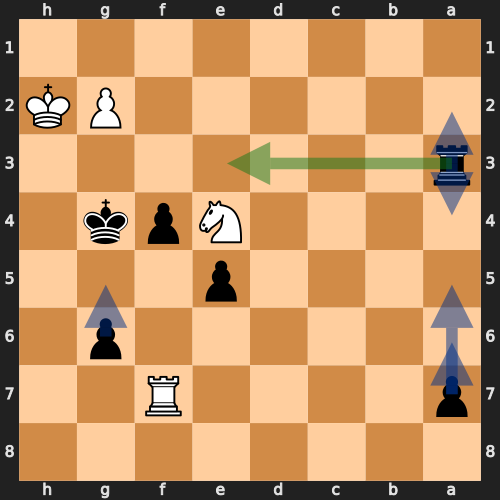

-16: a5
-11: Ra2
-10: a6
-5: g5
-3: Ra4
GM Move eval: 14

move 127
8/p4R2/6p1/4p3/4Npk1/4r3/6PK/8 w - - 6 64


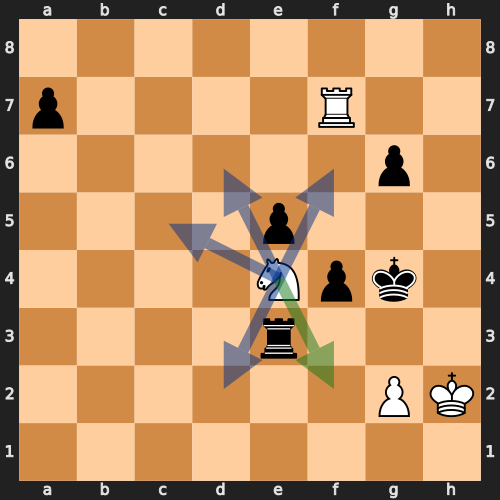

15: Nf2+
-2: Nf6+
-9: Nd6
-12: Nd2
-20: Nc5
GM Move eval: 9

move 129
8/p4R2/6p1/4p1k1/5p2/4r3/5NPK/8 w - - 8 65


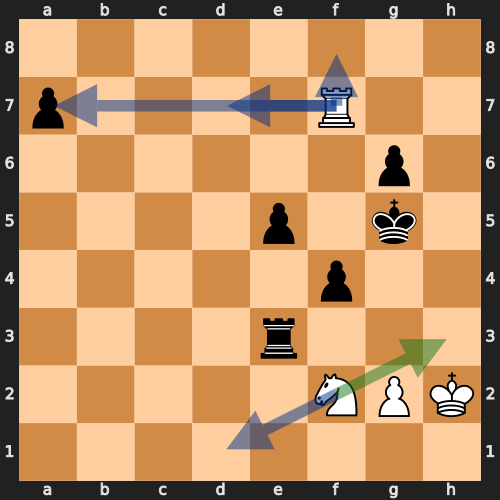

8: Rxa7
0: Nh3+
0: Rf8
-10: Nd1
-13: Rd7
GM Move eval: 0

move 130
8/p4R2/6p1/4p1k1/5p2/4r2N/6PK/8 b - - 9 65


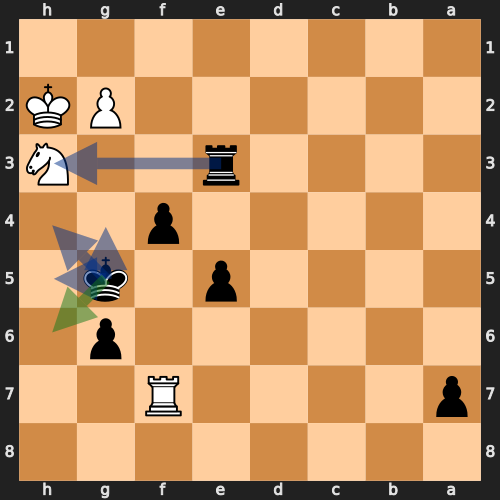

0: Kh6
16: Kh5
18: Kg4
27: Kh4
381: Rxh3+
GM Move eval: 0

move 131
8/p4R2/6pk/4p3/5p2/4r2N/6PK/8 w - - 10 66


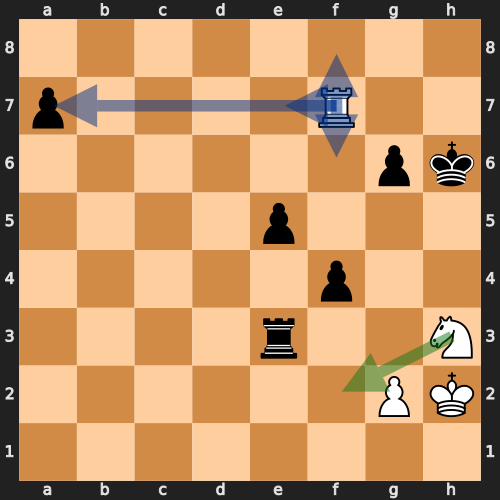

0: Rxa7
0: Nf2
-6: Rf6
-6: Rf8
-8: Re7
GM Move eval: 0

move 132
8/p4R2/6pk/4p3/5p2/4r3/5NPK/8 b - - 11 66


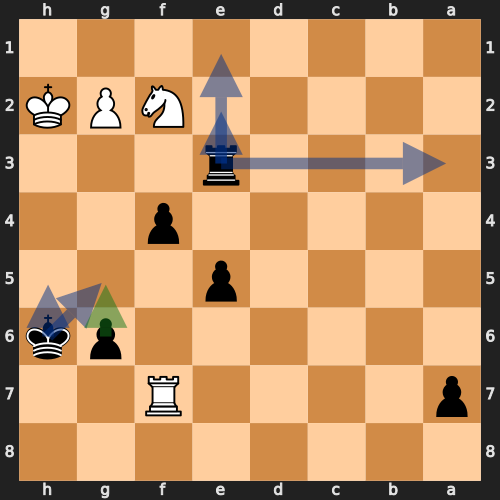

0: Re2
0: Re1
6: Kh5
7: Kg5
18: Ra3
GM Move eval: 178

move 133
8/p4R2/7k/4p1p1/5p2/4r3/5NPK/8 w - - 0 67


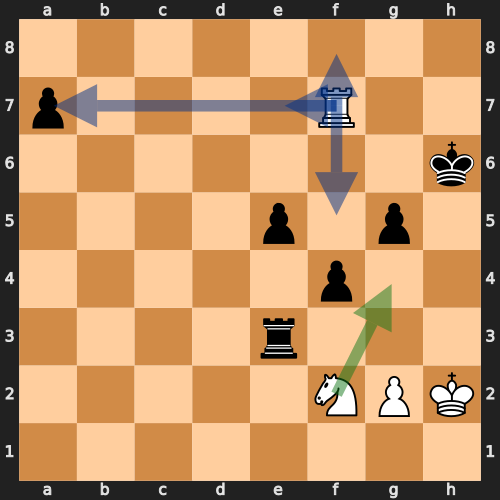

153: Ng4+
7: Rxa7
0: Rf8
0: Re7
0: Rf5
GM Move eval: 208

move 135
8/p4R2/6k1/4p1p1/5pN1/4r3/6PK/8 w - - 2 68


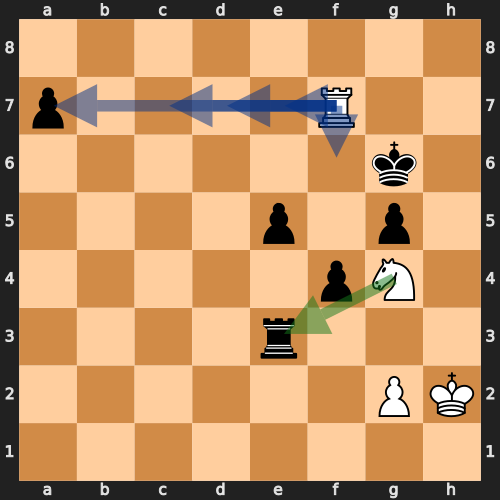

185: Rf6+
8: Rxa7
0: Rd7
0: Rc7
0: Re7
GM Move eval: -238

move 136
8/p4R2/6k1/4p1p1/5p2/4N3/6PK/8 b - - 0 68


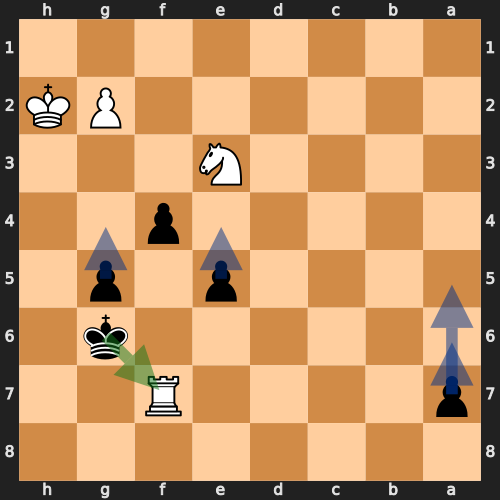

-220: Kxf7
423: e4
432: g4
433: a5
437: a6
GM Move eval: -236

move 137
8/p4k2/8/4p1p1/5p2/4N3/6PK/8 w - - 0 69


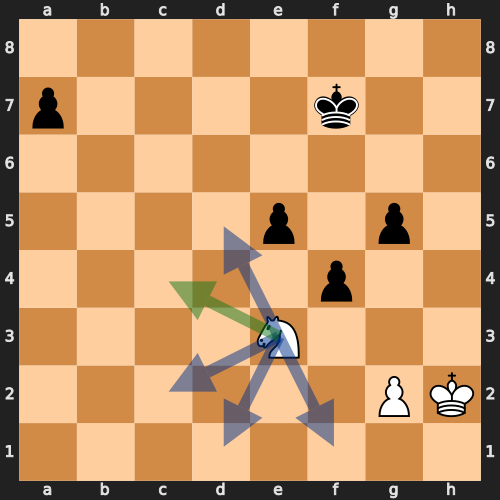

-273: Nc4
-307: Nd5
-336: Nc2
-349: Nd1
-354: Nf1
GM Move eval: -242

move 138
8/p4k2/8/4p1p1/2N2p2/8/6PK/8 b - - 1 69


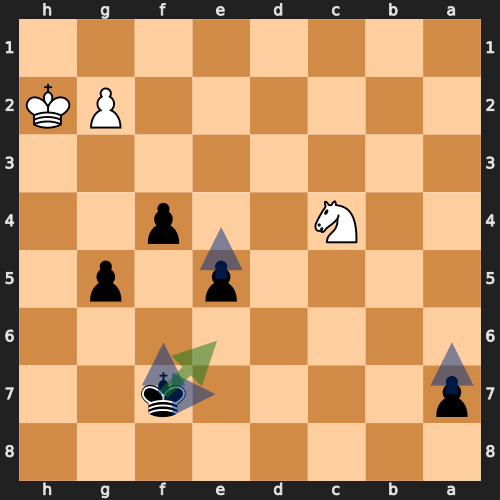

-240: Ke6
-198: Kf6
-41: e4
-38: Ke7
-29: a6
GM Move eval: -238

move 139
8/p7/4k3/4p1p1/2N2p2/8/6PK/8 w - - 2 70


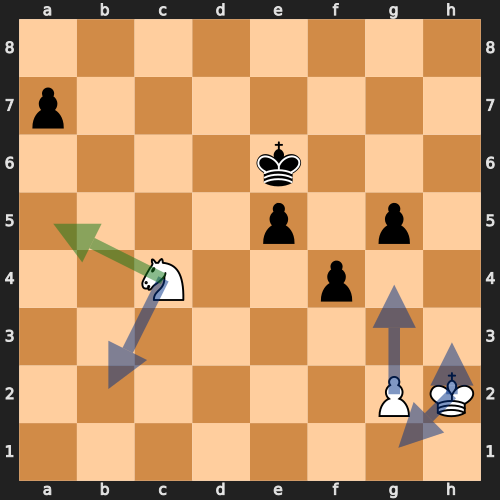

-318: Na5
-346: Kh3
-355: Kg1
-355: g4
-359: Nb2
GM Move eval: -273

move 140
8/p7/4k3/N3p1p1/5p2/8/6PK/8 b - - 3 70


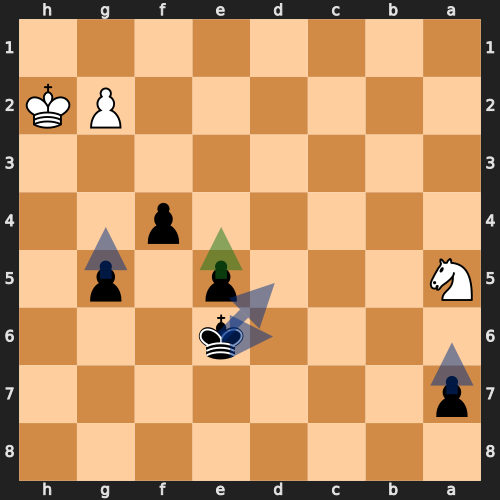

-335: g4
-312: Kd6
-307: Kd5
-274: e4
-218: a6
GM Move eval: -285

move 141
8/p7/4k3/N5p1/4pp2/8/6PK/8 w - - 0 71


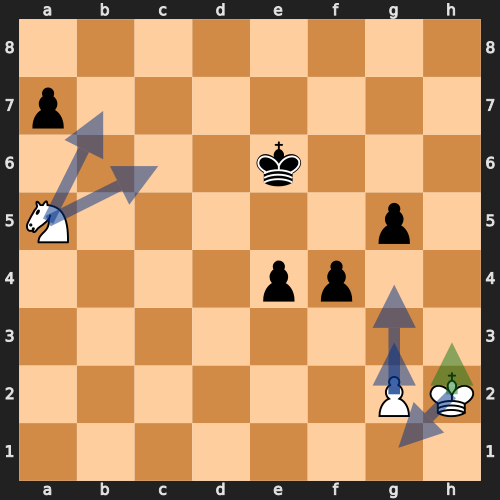

-288: Kg1
-333: Nc6
-339: g4
-349: g3
-349: Nb7
GM Move eval: -399

move 142
8/p7/4k3/N5p1/4pp2/7K/6P1/8 b - - 1 71


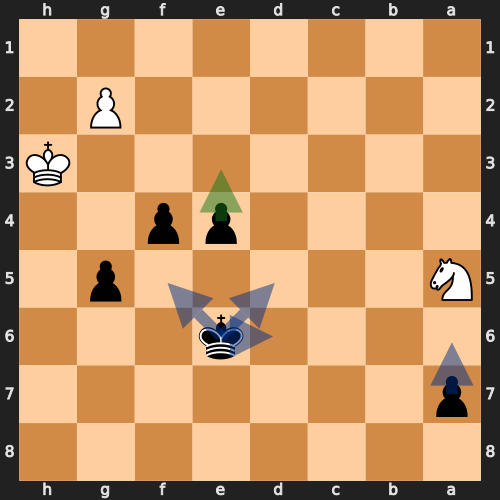

-416: e3
-333: Kf5
-332: Kd5
-320: a6
-312: Kd6
GM Move eval: -424

move 143
8/p7/4k3/N5p1/5p2/4p2K/6P1/8 w - - 0 72


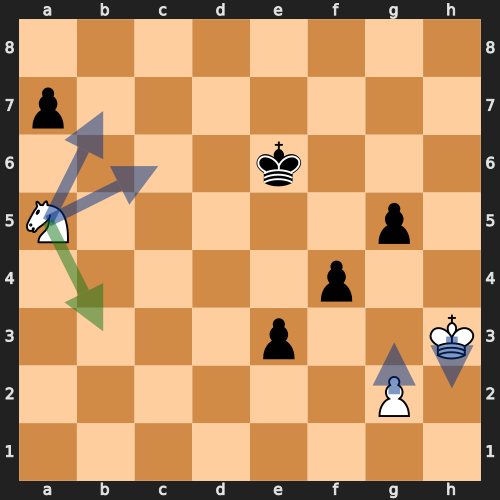

-456: Nb3
-487: Nb7
-489: Nc6
-601: Kh2
-654: g3
GM Move eval: -390

move 144
8/p7/4k3/6p1/5p2/1N2p2K/6P1/8 b - - 1 72


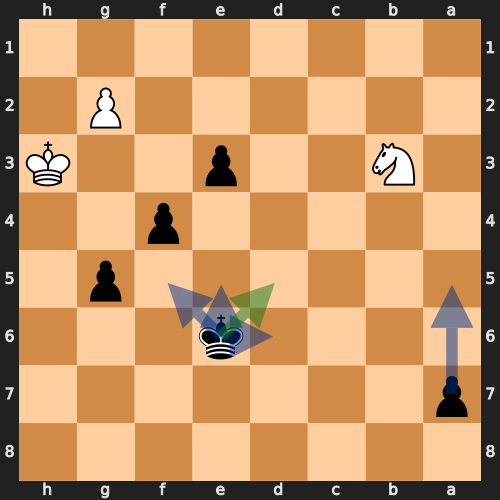

-455: Kd5
-418: Ke5
-394: a5
-392: Kf5
-391: Kd6
GM Move eval: -422

move 145
8/p7/8/3k2p1/5p2/1N2p2K/6P1/8 w - - 2 73


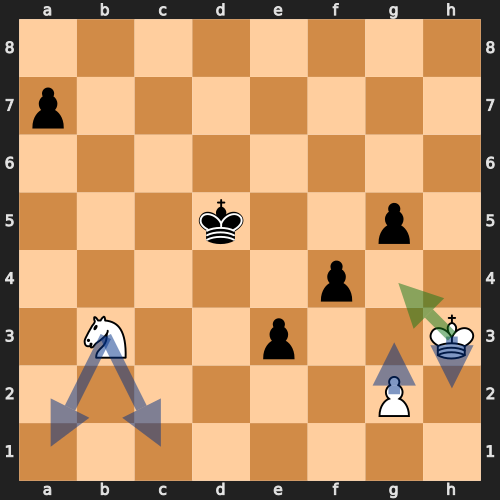

-476: Nc1
-486: Na1
-628: Kg4
-649: g3
-685: Kh2
GM Move eval: -623

move 146
8/p7/8/3k2p1/5pK1/1N2p3/6P1/8 b - - 3 73


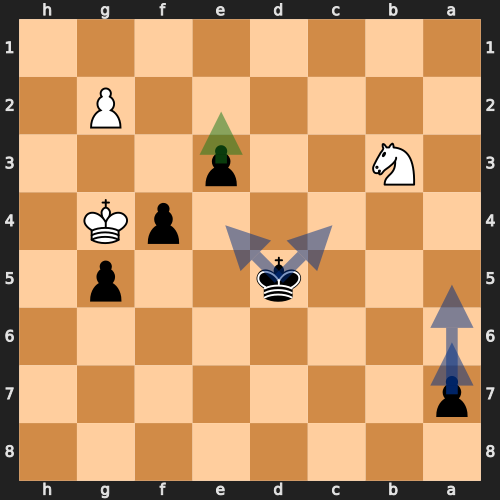

-655: e2
-435: a5
-402: Ke4
-396: a6
-375: Kc4
GM Move eval: -658

move 147
8/p7/8/3k2p1/5pK1/1N6/4p1P1/8 w - - 0 74


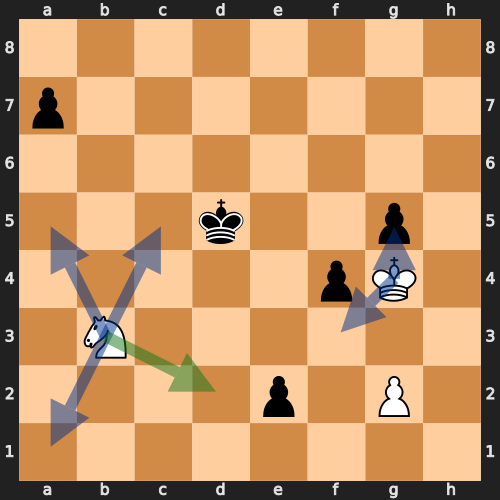

-666: Kxg5
-688: Na5
-708: Na1
-718: Nc5
-737: Kf3
GM Move eval: -714

move 148
8/p7/8/3k2p1/5pK1/8/3Np1P1/8 b - - 1 74


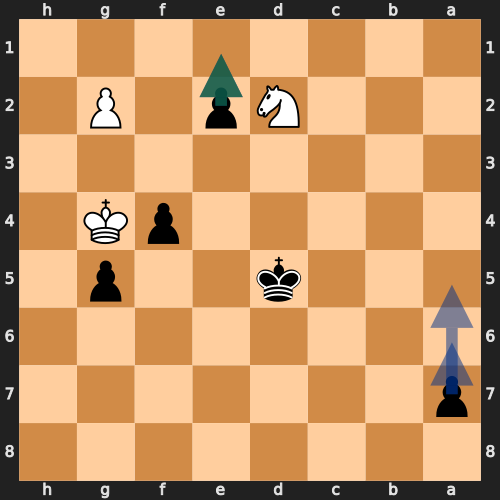

-631: e1=Q
-512: e1=R
-496: a5
-484: e1=B
-449: a6
GM Move eval: -684

move 149
8/p7/8/3k2p1/5pK1/8/3N2P1/4q3 w - - 0 75


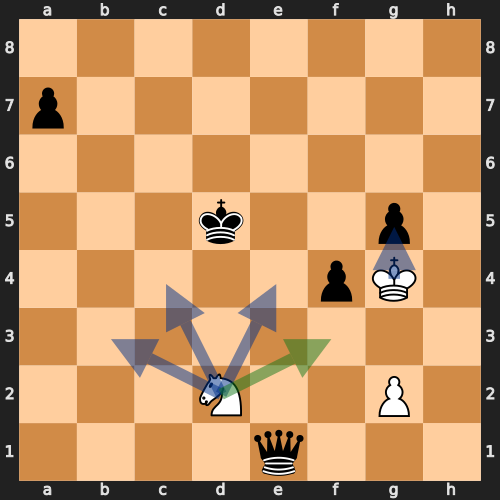

-696: Nf3
-908: Nc4
-910: Kxg5
-910: Nb3
-935: Ne4
GM Move eval: -666

move 150
8/p7/8/3k2p1/5pK1/5N2/6P1/4q3 b - - 1 75


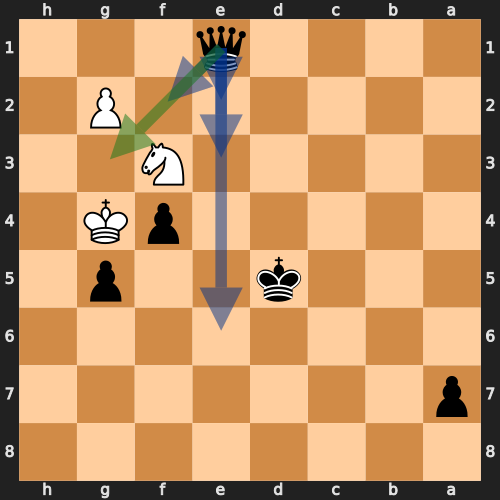

-768: Qe3
-766: Qe2
-755: Qf2
-745: Qg3+
-743: Qe6+
GM Move eval: -692

move 152
8/p7/8/3k1Kp1/5p2/5Nq1/6P1/8 b - - 3 76


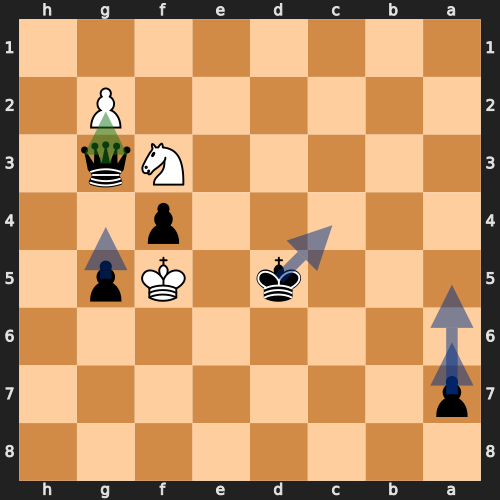

-793: Qxg2
-719: g4
-660: a5
-650: a6
-619: Kc4
GM Move eval: -821

move 153
8/p7/8/3k1Kp1/5p2/5N2/6q1/8 w - - 0 77


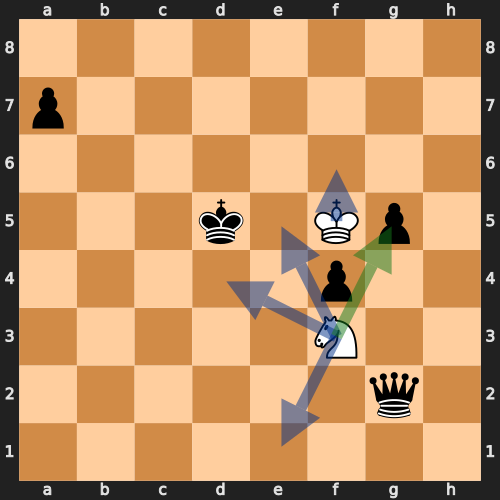

-694: Nxg5
None: Ne1
None: Nd4
None: Ne5
None: Kf6
GM Move eval: -671

move 154
8/p7/8/3k1KN1/5p2/8/6q1/8 b - - 0 77


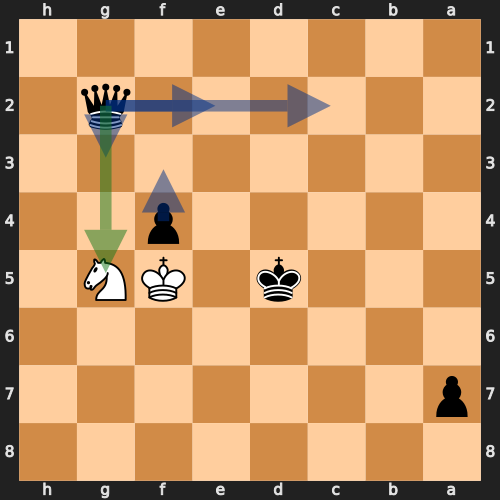

-812: Qg3
-811: f3
-680: Qxg5+
-625: Qc2+
-623: Qe2
GM Move eval: -658

move 156
8/p7/8/3k2K1/5p2/8/8/8 b - - 0 78


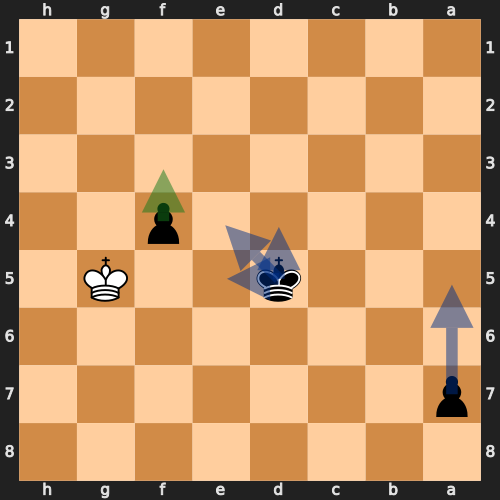

-764: Ke4
-764: Ke5
-758: f3
-619: a5
-616: Kd4
GM Move eval: -883

move 157
8/p7/8/3k2K1/8/5p2/8/8 w - - 0 79


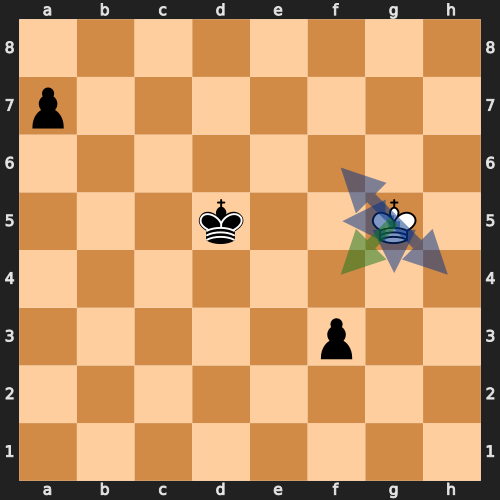

-957: Kf4
-1084: Kf6
-1114: Kg4
-1114: Kh4
-1117: Kf5
GM Move eval: -877

move 158
8/p7/8/3k4/5K2/5p2/8/8 b - - 1 79


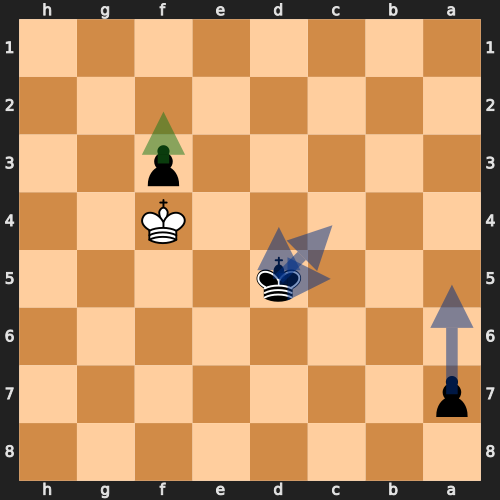

-898: f2
-578: Kd4
-574: Kc4
-550: a5
-549: Kc5
GM Move eval: -888

move 159
8/p7/8/3k4/5K2/8/5p2/8 w - - 0 80


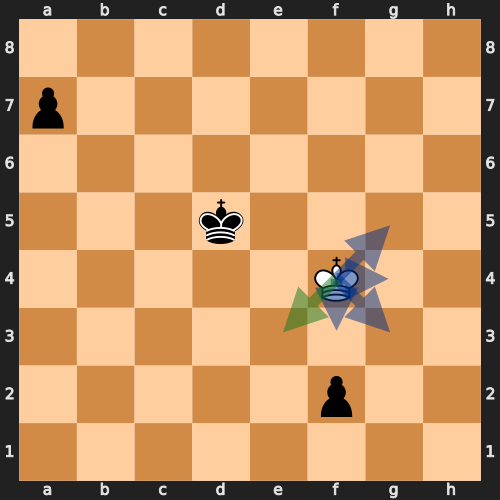

-1213: Ke3
None: Kf3
None: Kg5
None: Kg3
None: Kg4
GM Move eval: -1136

move 160
8/p7/8/3k4/8/4K3/5p2/8 b - - 1 80


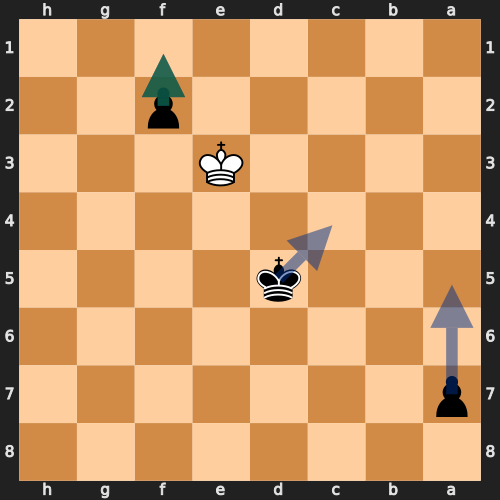

-910: f1=Q
-681: f1=N+
-601: Kc4
-584: f1=R
-546: a5
GM Move eval: -1061

move 162
8/p7/8/3k4/8/8/3K4/5q2 b - - 1 81


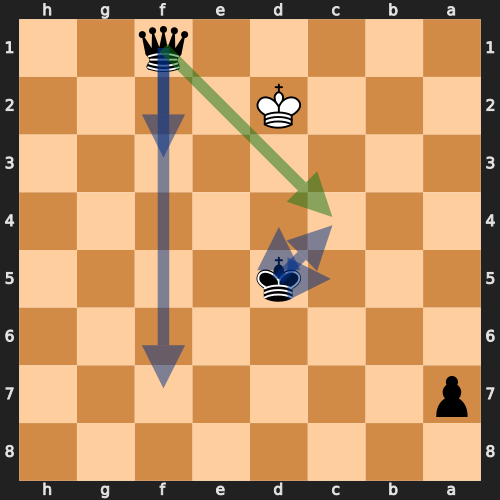

None: Qf3
None: Kc5
None: Qf7
-1184: Kc4
-1138: Kd4
GM Move eval: -1178

move 164
8/p7/8/3k4/2q5/4K3/8/8 b - - 3 82


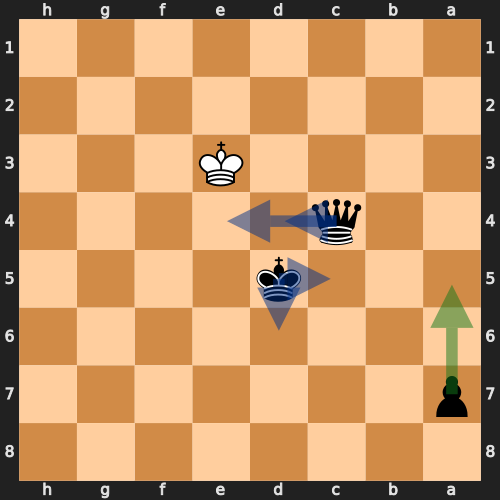

None: Kc5
None: Qe4+
None: Qd4+
None: a5
None: Kd6
GM Move eval: -8

move 166
8/8/8/p2k4/2q5/8/3K4/8 b - - 1 83


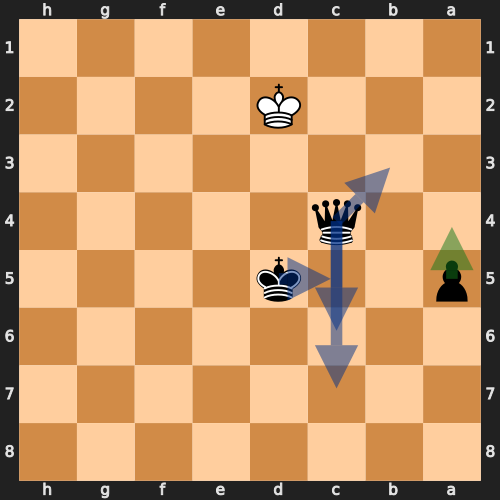

None: a4
None: Qb3
None: Qc6
None: Kc5
None: Qc7
GM Move eval: -11


In [35]:
def get_puzzles_from_game(pgn):
    board = chess.Board()
    game = chess.pgn.read_game(pgn)
    white = game.headers["White"]
    black = game.headers["Black"]
    link = game.headers["Link"]
    move_no=1
    is_white=True
    print("link " + link)
    positions = []
    for move_obj in game.mainline_moves(): 
        move_san = board.san(move_obj)
        move_uci = board.uci(move_obj)
        if move_no>30 and move_no<100:
            
            stockfish.set_fen_position(board.fen())
            top_moves = stockfish.get_top_moves(5)
           
            if len(top_moves)==5:
                position = {}
                top_moves_obj = []
                position["top_five"] = []
                for move_dict in top_moves:
                    top_moves_obj.append(board.parse_uci(move_dict['Move']))
                    position["top_five"].append({"uci": move_dict["Move"], "eval":})
                arrow_arr = []
                for top_move in top_moves_obj:
                    if top_move!=move_obj:
                        arrow_arr.append(chess.svg.Arrow(top_move.from_square,top_move.to_square, color="blue"))
                arrow_arr.append(chess.svg.Arrow(move_obj.from_square,move_obj.to_square, color="green"))
                print("\nmove " + str(move_no))
                print(board.fen())
                display(SVG(chess.svg.board(board, size=500, orientation=is_white, \
                arrows=arrow_arr)))
                for top_move in top_moves:
                    print(str(top_move['Centipawn']) + ": " + board.san(board.parse_uci(top_move['Move'])))
                
                board.push(move_obj)
                stockfish.set_fen_position(board.fen())
                stockfish_get_eval = stockfish.get_evaluation()
                print("GM Move eval: " + str(stockfish_get_eval['value']))
                board.pop()
                positions.append(position)
            
        board.push(move_obj)
        move_no+=1
        is_white = not is_white
    
get_puzzles_from_game(pgn)        
    

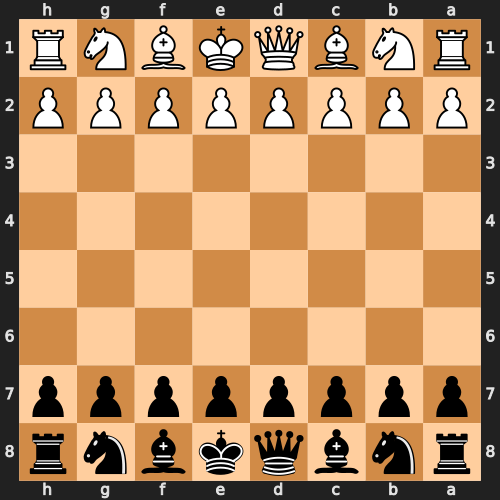

In [ ]:
#these functions are all for reference, don't contribute to the actual code
board=chess.Board()
first_game = chess.pgn.read_game(pgn)
print(first_game.headers["White"])
print(first_game.headers["Black"])
for move in first_game.mainline_moves():
    print(move)
    
second_game = chess.pgn.read_game(pgn)
print(second_game.headers["White"])
print(second_game.headers["Black"])
for move in second_game.mainline_moves():
    print(move)

display(SVG(chess.svg.board(board, size=500, orientation=chess.BLACK)))
display(SVG(chess.svg.board(board, size=500)))